In [722]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [723]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [724]:
#plt.rcParams['font.size'] = 16
#plt.rcParams['axes.grid'] = True
#plt.rcParams['figure.figsize'] = (7,5)


In [725]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, feat_1=0, feat_2=1, resolution= 0.05, size=(12, 7)):
    # setup marker generator and color map
    markers = ('o', 'v')
    marker_colors = ('red', 'blue')
    backgrpund_colors = ('cyan', 'grey')
    cmap = ListedColormap(backgrpund_colors[:len(np.unique(y))])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
    classifier.fit(X_train.iloc[:, [feat_1, feat_2]], y_train)
    # plot the decision surface
    x1_min, x1_max = X_train.iloc[:,  feat_1].min() - 1, X_train.iloc[:, feat_1].max() + 1
    x2_min, x2_max = X_train.iloc[:, feat_2].min() - 1, X_train.iloc[:, feat_2].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize= size)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.colorbar(ticks = [0, 1])

    # plot class samples
    for idx, cl in enumerate(np.sort(y.unique())):
        xx = X.loc[y==cl]
        plt.scatter(x= xx.iloc[:, feat_1], y= xx.iloc[:, feat_2], alpha=0.3, c= marker_colors[idx],
        marker=markers[idx], label=cl)
    plt.xlabel(X.columns[feat_1])
    plt.ylabel(X.columns[feat_2])
    plt.legend()
    plt.show()

# Read the data

In [726]:
churn=pd.read_csv("Customer+Churn+Data.csv")

In [727]:
pd.set_option('display.max_columns',None)


In [728]:
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


# Data Info

In [691]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

We have 11260 rows ,19 columns
We have int,object,float type data

# Data Shape

In [692]:
churn.shape

(11260, 19)

# Data Summary

In [693]:
churn.describe(include='all')

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.00000,11260.000000,11158,11148.000000,11158.000000,11151,11152,11162.000000,11148,11163,11144.000000,11048,11158,10903.000000,11260,11260,10903,10789,11039
unique,NaN,NaN,38,NaN,NaN,5,4,NaN,7,7,NaN,3,59,NaN,20,20,24,321,3
top,NaN,NaN,1,NaN,NaN,Debit Card,Male,NaN,4,Super,NaN,Married,3,NaN,14,1,3,152,Mobile
freq,NaN,NaN,1351,NaN,NaN,4587,6328,NaN,4569,4062,NaN,5860,1746,NaN,1524,4373,1816,208,7482
mean,25629.50000,0.168384,NaN,1.653929,17.867091,NaN,NaN,2.902526,NaN,NaN,3.066493,NaN,NaN,0.285334,NaN,NaN,NaN,NaN,NaN
std,3250.62635,0.374223,NaN,0.915015,8.853269,NaN,NaN,0.725584,NaN,NaN,1.379772,NaN,NaN,0.451594,NaN,NaN,NaN,NaN,NaN
min,20000.00000,0.000000,NaN,1.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,22814.75000,0.000000,NaN,1.000000,11.000000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,25629.50000,0.000000,NaN,1.000000,16.000000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,28444.25000,0.000000,NaN,3.000000,23.000000,NaN,NaN,3.000000,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [694]:
churn.size

213940

# Null value prediction

In [695]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [729]:
churn.isnull().sum().sum()

2676

Total 2676 null values present in data

# Duplicate values prediction

In [730]:
churn.duplicated().sum()

0

In [731]:
(2676/213940)*100


1.2508179863513134

We do not have any duplicate values present in data

In [699]:
# Unique value count for object data type
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

We have special characters present in most of the columns,which needs to be treated

# Treating special characters

In [732]:
churn['Tenure'] = churn['Tenure'].replace('#',np.NaN)
churn['Account_user_count']=churn['Account_user_count'].replace('@',np.NaN)
churn['rev_per_month']=churn['rev_per_month'].replace('+',np.NaN)
churn['rev_growth_yoy']=churn['rev_growth_yoy'].replace('$',np.NaN)
churn['coupon_used_for_payment']=churn['coupon_used_for_payment'].replace('$',np.NaN)
churn['coupon_used_for_payment']=churn['coupon_used_for_payment'].replace('#',np.NaN)
churn['coupon_used_for_payment']=churn['coupon_used_for_payment'].replace('*',np.NaN)
churn['Day_Since_CC_connect']=churn['Day_Since_CC_connect'].replace('$',np.NaN)
churn['Login_device']=churn['Login_device'].replace('&&&&',np.NaN)
churn['cashback']=churn['cashback'].replace('$',np.NaN)

Special characters replaced by nan values

In [733]:
churn.drop(columns='AccountID',inplace=True)

# Datatype changes

In [734]:
churn['Tenure'] = churn['Tenure'].astype('float64')
churn['rev_per_month']=churn['rev_per_month'].astype('float64')
churn['cashback']=churn['cashback'].astype('float64')
churn['rev_growth_yoy']=churn['rev_growth_yoy'].astype('float64')

In [735]:
churn['City_Tier'] = churn['City_Tier'].astype('object')
churn['Service_Score'] = churn['Service_Score'].astype('object')
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype('object')
churn['Churn'] = churn['Churn'].astype('object')
churn['Complain_ly'] = churn['Complain_ly'].astype('object')
churn['Churn']=churn['Churn'].astype('int')

In [736]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int32  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       10816 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

# Clean the dataset -- Correction in the categorical values

In [737]:
churn['Gender']=np.where(churn['Gender'] =='F', 'Female', churn['Gender'])

In [738]:
churn['Gender']=np.where(churn['Gender'] =='M', 'Male', churn['Gender'])

In [739]:
churn['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [740]:
churn['account_segment']=np.where(churn['account_segment'] =='Super +', 'Super Plus', churn['account_segment'])

In [741]:
churn['account_segment']=np.where(churn['account_segment'] =='Regular +', 'Regular Plus', churn['account_segment'])

In [742]:
churn['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [743]:
churn.describe(include='all')

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.000000,11042.000000,11148.0,11158.000000,11151,11152,11162.0,10816,11163,11144.0,11048,10469.000000,10903.0,11257.000000,11257,10902,10787.000000,10500
unique,NaN,NaN,3.0,NaN,5,2,6.0,6,5,5.0,3,NaN,2.0,NaN,17,23,NaN,2
top,NaN,NaN,1.0,NaN,Debit Card,Male,3.0,4,Regular Plus,3.0,Married,NaN,0.0,NaN,1,3,NaN,Mobile
freq,NaN,NaN,7263.0,NaN,4587,6704,5490.0,4569,4124,3360.0,5860,NaN,7792.0,NaN,4373,1816,NaN,7482
mean,0.168384,11.025086,NaN,17.867091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.362594,NaN,16.193391,NaN,NaN,196.235376,NaN
std,0.374223,12.879782,NaN,8.853269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.909686,NaN,3.757721,NaN,NaN,178.656881,NaN
min,0.000000,0.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,NaN,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,13.000000,NaN,NaN,147.000000,NaN
50%,0.000000,9.000000,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,15.000000,NaN,NaN,165.000000,NaN
75%,0.000000,16.000000,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,19.000000,NaN,NaN,200.000000,NaN


In [744]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9.0,1.0,11.0,1,5,160.0,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7.0,1.0,15.0,0,0,121.0,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6.0,1.0,14.0,0,3,NaN,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8.0,0.0,23.0,0,3,134.0,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3.0,0.0,11.0,1,3,130.0,Mobile


In [745]:
churn.to_csv(r'C:\Users\91702\Desktop\PGP-DataScience\Capstone_project\churn_capstone.csv')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\91702\\Desktop\\PGP-DataScience\\Capstone_project\\churn_capstone.csv'

For City_Tier 1 seems to be freq
Payment Debit Card seems to be freq use
For Gender ,male are more frequent customers
For service_score 3 is more frequent
Account_segment-Super
Marital-married

In [715]:
cat=[]
num=[]
for i in churn.columns:
    if churn[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'Login_device']
['Churn', 'Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'cashback']


# Univariate analysis

Churn
 


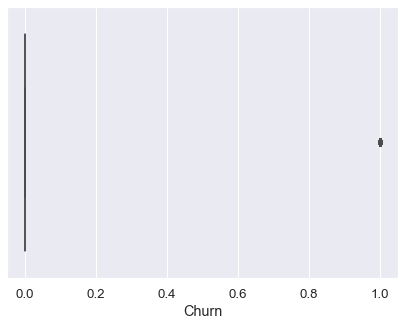

Tenure
 


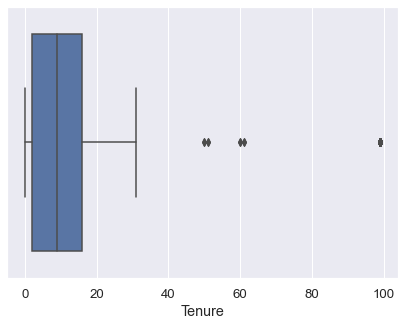

CC_Contacted_LY
 


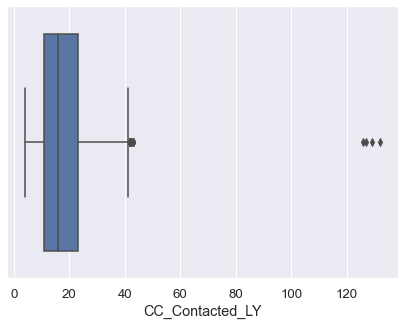

rev_per_month
 


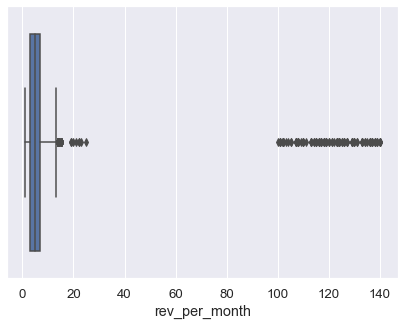

rev_growth_yoy
 


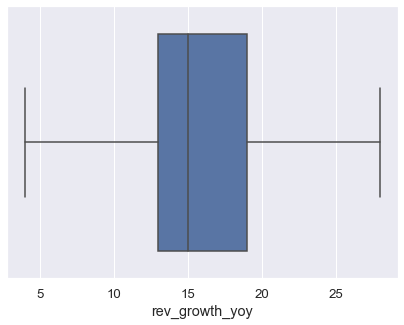

cashback
 


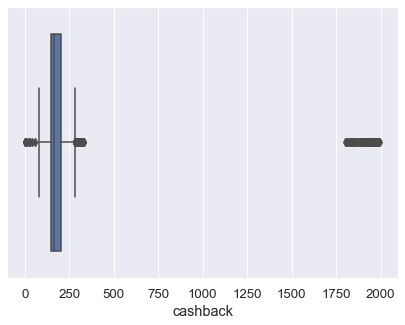

In [746]:
for i in num:
    print(i)
    print(" ")
    sns.boxplot(churn[i])
    plt.show()

Churn
 


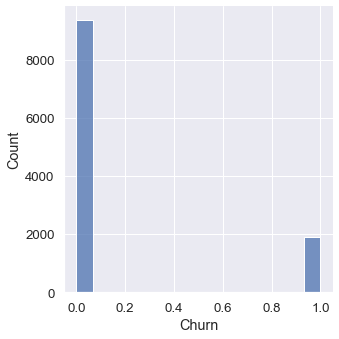

Tenure
 


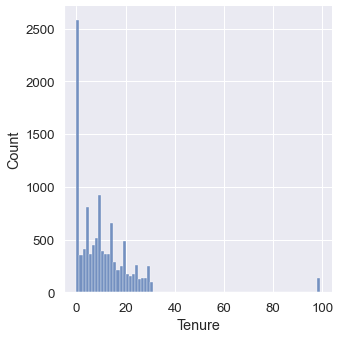

CC_Contacted_LY
 


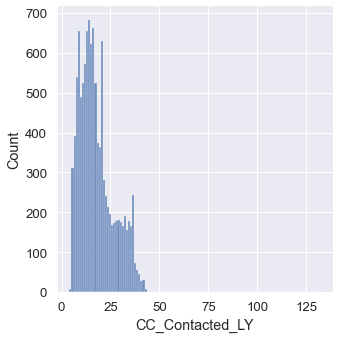

rev_per_month
 


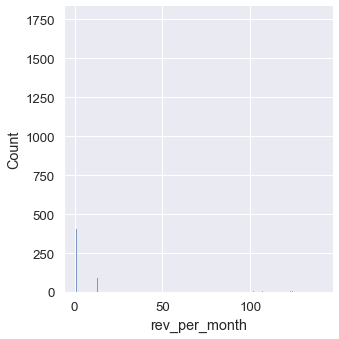

rev_growth_yoy
 


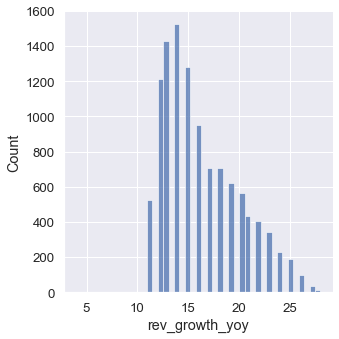

cashback
 


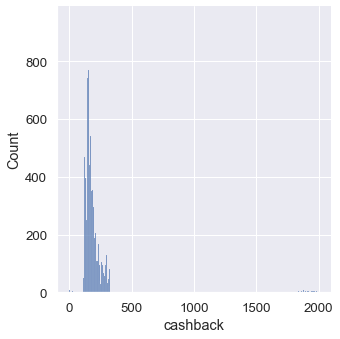

In [747]:
for i in num:
    print(i)
    print(" ")
    sns.displot(churn[i])
    plt.show()

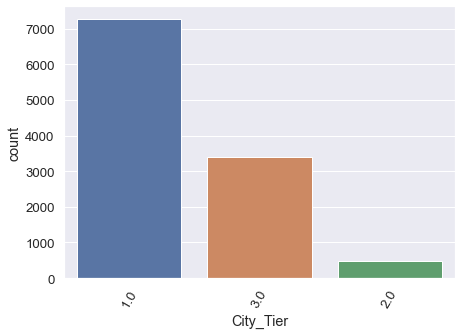

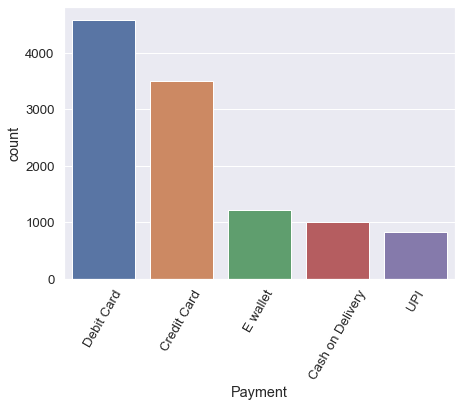

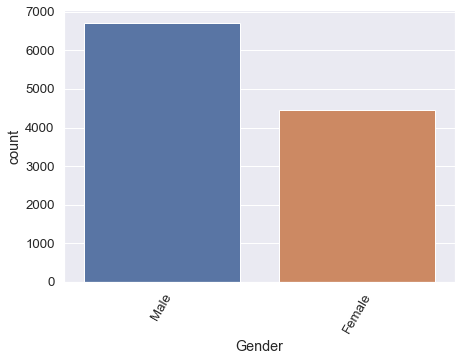

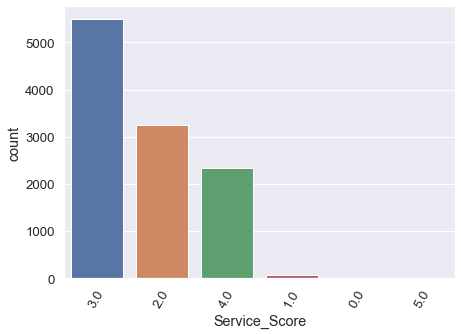

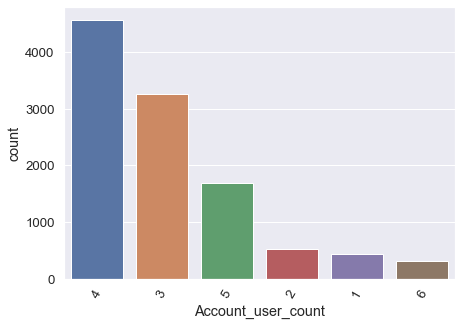

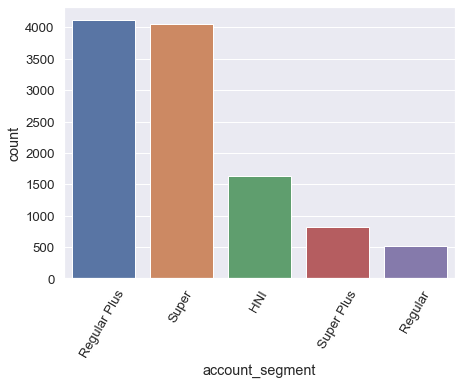

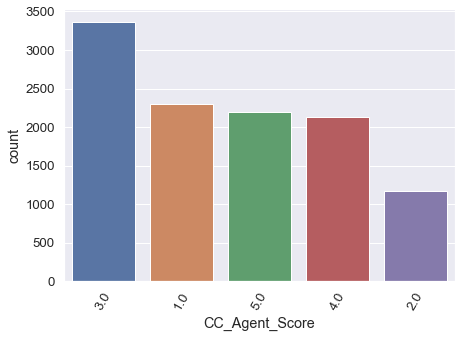

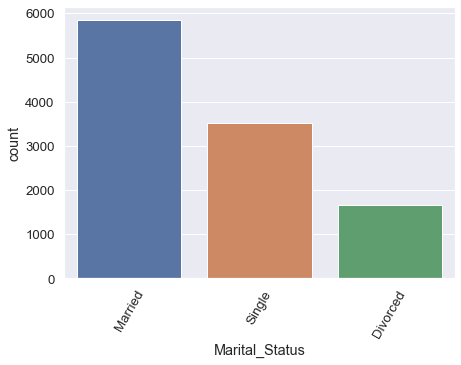

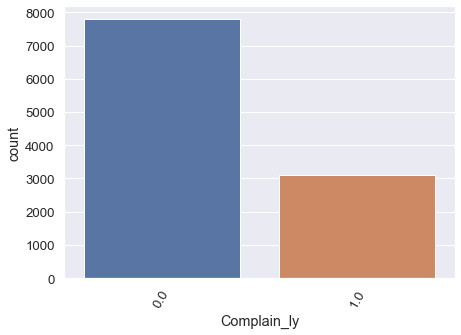

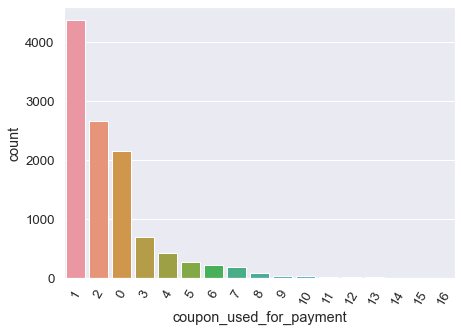

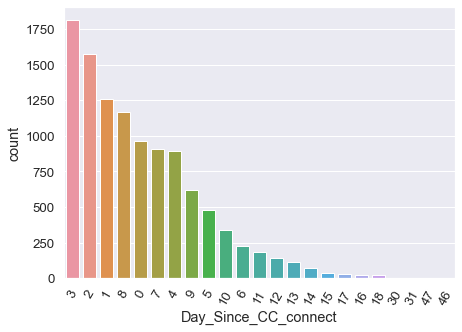

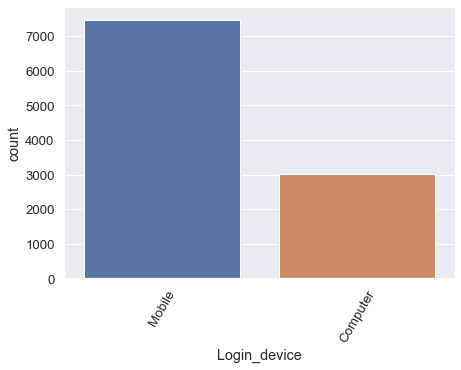

In [503]:
for i in cat:
    sns.countplot(churn[i],order = churn[i].value_counts().index)
    plt.xticks(rotation = 60)
    plt.show()

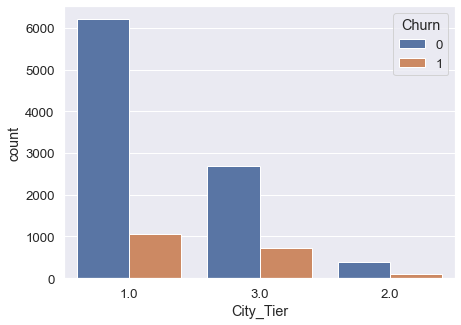

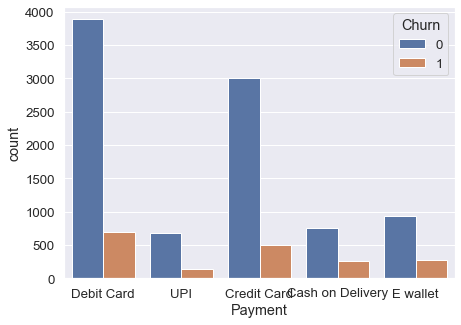

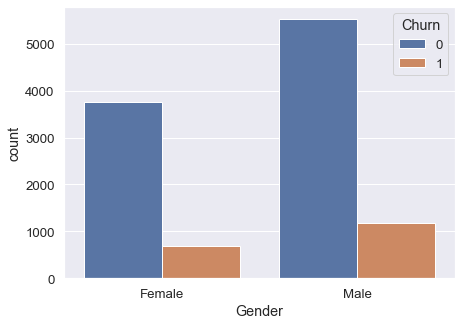

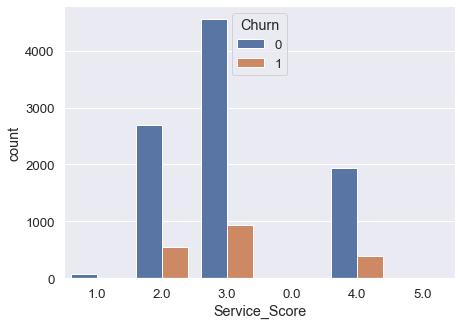

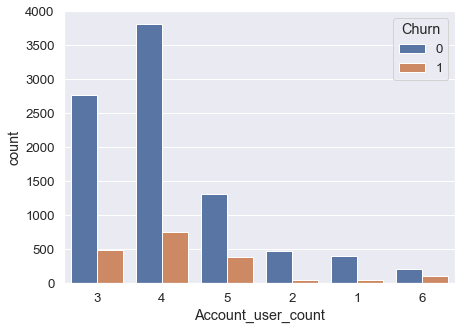

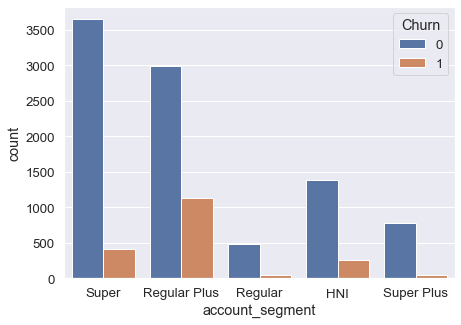

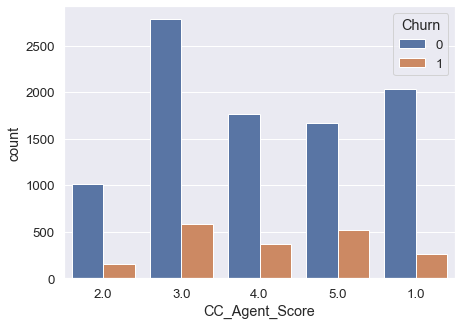

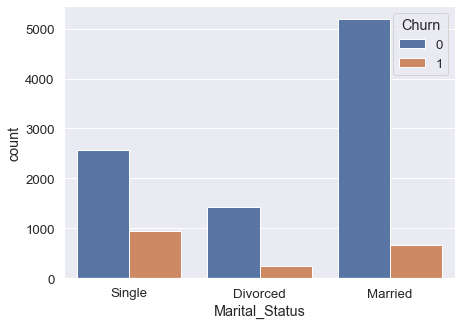

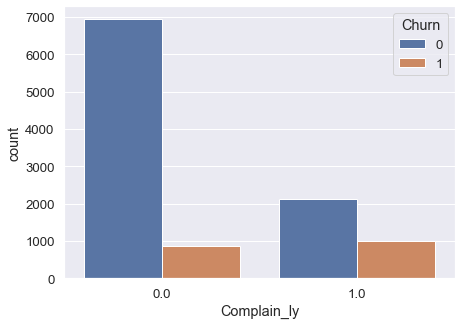

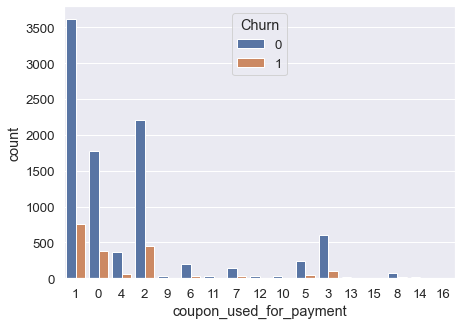

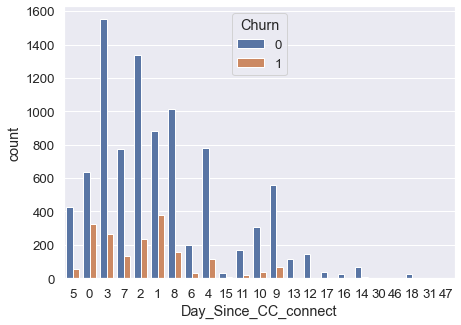

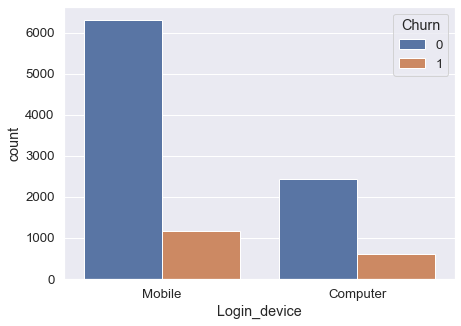

In [504]:
for i in cat:
    sns.countplot(churn[i],hue = churn['Churn'])
    plt.show()

In [505]:
# Count of null values after treating special characters

In [508]:
churn.isnull().sum().sum()

4361

In [509]:
churn['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

# Target value count

In [510]:
churn['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [511]:
churn['Churn'].value_counts(normalize ='True')

0    0.831616
1    0.168384
Name: Churn, dtype: float64

# Manual encoding for object type features

In [543]:
churn['Gender']=np.where(churn['Gender'] =='Male', '1', churn['Gender'])
churn['Gender']=np.where(churn['Gender'] =='Female', '0', churn['Gender'])

In [544]:
churn['Payment']=np.where(churn['Payment'] =='Debit Card', '0', churn['Payment'])
churn['Payment']=np.where(churn['Payment'] =='Credit Card', '1', churn['Payment'])
churn['Payment']=np.where(churn['Payment'] =='E wallet', '2', churn['Payment'])
churn['Payment']=np.where(churn['Payment'] =='Cash on Delivery', '3', churn['Payment'])
churn['Payment']=np.where(churn['Payment'] =='UPI', '4', churn['Payment'])

In [545]:
churn['account_segment']=np.where(churn['account_segment'] =='Regular', '0', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='Regular Plus', '1', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='Super', '2', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='Super Plus', '3', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='HNI', '4', churn['account_segment'])


In [546]:
churn['Marital_Status']=np.where(churn['Marital_Status'] =='Single', '0', churn['Marital_Status'])
churn['Marital_Status']=np.where(churn['Marital_Status'] =='Married', '1', churn['Marital_Status'])
churn['Marital_Status']=np.where(churn['Marital_Status'] =='Divorced', '2', churn['Marital_Status'])

In [547]:
churn['Login_device']=np.where(churn['Login_device'] =='Mobile', '0', churn['Login_device'])
churn['Login_device']=np.where(churn['Login_device'] =='Computer', '1', churn['Login_device'])

In [548]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,0,0,3.0,3,2,2.0,0,9.0,1.0,11.0,1,5,160.0,0
1,1,0.0,1.0,8.0,4,1,3.0,4,1,3.0,0,7.0,1.0,15.0,0,0,121.0,0
2,1,0.0,1.0,30.0,0,1,2.0,4,1,3.0,0,6.0,1.0,14.0,0,3,NaN,0
3,1,0.0,3.0,15.0,0,1,2.0,4,2,5.0,0,8.0,0.0,23.0,0,3,134.0,0
4,1,0.0,1.0,12.0,1,1,2.0,3,1,5.0,0,3.0,0.0,11.0,1,3,130.0,0


# Feature Engineering

In [549]:
#churn['Tenure_bin'] = pd.cut(churn.Tenure, bins=[0,10,20,30,40,50,60,70,80], labels=[0,10,20,30,40,50,60,70])

In [550]:
#sns.set(font_scale=1)
#fig, ax = plt.subplots(figsize = (15,10))
#sns.countplot('Tenure_bin', hue='Churn', data=churn)
#plt.xlabel('Tenure bin, months')

# Splitting the data in to Target and Predictors

In [551]:
churn_X = churn.drop('Churn', axis = 1)
churn_Y = churn['Churn']

In [552]:
churn_X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,0,0,3.0,3,2,2.0,0,9.0,1.0,11.0,1,5,160.0,0
1,0.0,1.0,8.0,4,1,3.0,4,1,3.0,0,7.0,1.0,15.0,0,0,121.0,0
2,0.0,1.0,30.0,0,1,2.0,4,1,3.0,0,6.0,1.0,14.0,0,3,NaN,0
3,0.0,3.0,15.0,0,1,2.0,4,2,5.0,0,8.0,0.0,23.0,0,3,134.0,0
4,0.0,1.0,12.0,1,1,2.0,3,1,5.0,0,3.0,0.0,11.0,1,3,130.0,0


In [553]:
churn_X.isnull().sum()

Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

# Scaling before KNN Imputation

In [554]:
#from sklearn.preprocessing import StandardScaler #Scale train and test separately
#scaler = StandardScaler()
#churn_X_scaled = pd.DataFrame(scaler.fit_transform(churn_X), columns = churn_X.columns)

In [555]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

In [556]:
churn_X_scaled = pd.DataFrame(minmax.fit_transform(churn_X), columns=churn_X.columns)

In [557]:
churn_X_scaled.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,0.040404,1.0,0.015625,0.00,0.0,0.6,0.4,0.50,0.25,0.0,0.057554,1.0,0.291667,0.0625,0.106383,0.080120,0.0
1,0.000000,0.0,0.031250,1.00,1.0,0.6,0.6,0.25,0.50,0.0,0.043165,1.0,0.458333,0.0000,0.000000,0.060591,0.0
2,0.000000,0.0,0.203125,0.00,1.0,0.4,0.6,0.25,0.50,0.0,0.035971,1.0,0.416667,0.0000,0.063830,NaN,0.0
3,0.000000,1.0,0.085938,0.00,1.0,0.4,0.6,0.50,1.00,0.0,0.050360,0.0,0.791667,0.0000,0.063830,0.067101,0.0
4,0.000000,0.0,0.062500,0.25,1.0,0.4,0.4,0.25,1.00,0.0,0.014388,0.0,0.291667,0.0625,0.063830,0.065098,0.0


In [558]:
churn_X_scaled.isnull().sum().sum()

4361

# Heat map showing null values

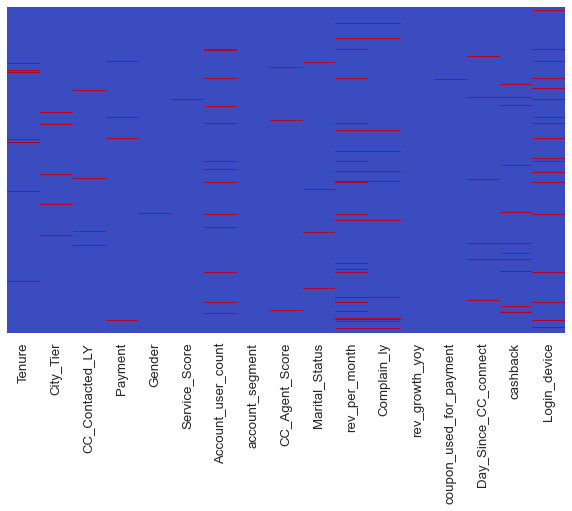

In [559]:
plt.figure(figsize = (10,6))
sns.heatmap(churn_X_scaled.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

# KNN Imputation

In [560]:
from sklearn.impute import KNNImputer

In [561]:
imputer = KNNImputer(n_neighbors=5)

In [562]:
imputer1 = KNNImputer(n_neighbors=5)

In [563]:
churn_X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,0,0,3.0,3,2,2.0,0,9.0,1.0,11.0,1,5,160.0,0
1,0.0,1.0,8.0,4,1,3.0,4,1,3.0,0,7.0,1.0,15.0,0,0,121.0,0
2,0.0,1.0,30.0,0,1,2.0,4,1,3.0,0,6.0,1.0,14.0,0,3,NaN,0
3,0.0,3.0,15.0,0,1,2.0,4,2,5.0,0,8.0,0.0,23.0,0,3,134.0,0
4,0.0,1.0,12.0,1,1,2.0,3,1,5.0,0,3.0,0.0,11.0,1,3,130.0,0


In [564]:
churn_X = churn_X.drop('Tenure_bin', axis = 1)

KeyError: "['Tenure_bin'] not found in axis"

In [534]:
churn_X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,0,0,3.0,3,2,2.0,0,9.0,1.0,11.0,1,5,160.0,0
1,0.0,1.0,8.0,4,1,3.0,4,1,3.0,0,7.0,1.0,15.0,0,0,121.0,0
2,0.0,1.0,30.0,0,1,2.0,4,1,3.0,0,6.0,1.0,14.0,0,3,NaN,0
3,0.0,3.0,15.0,0,1,2.0,4,2,5.0,0,8.0,0.0,23.0,0,3,134.0,0
4,0.0,1.0,12.0,1,1,2.0,3,1,5.0,0,3.0,0.0,11.0,1,3,130.0,0


In [302]:
churn_X_scaled=churn_X_scaled.drop('Tenure_bin', axis = 1)

KeyError: "['Tenure_bin'] not found in axis"

In [565]:
churn_X_imputed = pd.DataFrame(imputer.fit_transform(churn_X), columns = churn_X.columns)

In [566]:
churn_X_imputed_scaled = pd.DataFrame(imputer1.fit_transform(churn_X_scaled), columns = churn_X_scaled.columns)

In [567]:
churn_X_imputed_scaled.isnull().sum().sum()

0

In [568]:
churn_X_imputed_scaled.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,0.040404,1.0,0.015625,0.00,0.0,0.6,0.4,0.50,0.25,0.0,0.057554,1.0,0.291667,0.0625,0.106383,0.080120,0.0
1,0.000000,0.0,0.031250,1.00,1.0,0.6,0.6,0.25,0.50,0.0,0.043165,1.0,0.458333,0.0000,0.000000,0.060591,0.0
2,0.000000,0.0,0.203125,0.00,1.0,0.4,0.6,0.25,0.50,0.0,0.035971,1.0,0.416667,0.0000,0.063830,0.066600,0.0
3,0.000000,1.0,0.085938,0.00,1.0,0.4,0.6,0.50,1.00,0.0,0.050360,0.0,0.791667,0.0000,0.063830,0.067101,0.0
4,0.000000,0.0,0.062500,0.25,1.0,0.4,0.4,0.25,1.00,0.0,0.014388,0.0,0.291667,0.0625,0.063830,0.065098,0.0


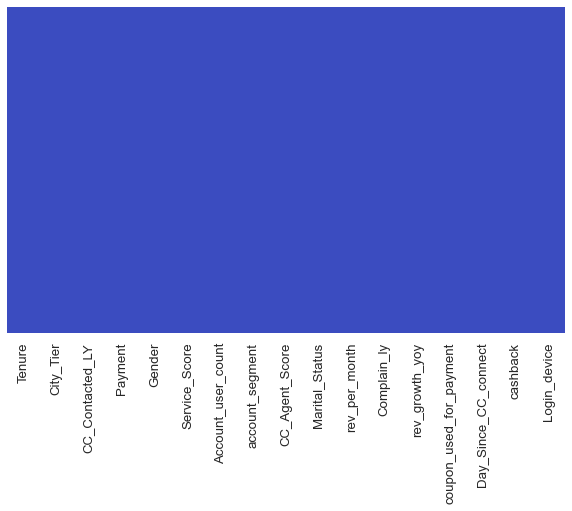

In [569]:
plt.figure(figsize = (10,6))
sns.heatmap(churn_X_imputed.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [570]:
churn_X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  float64
 4   Gender                   11260 non-null  float64
 5   Service_Score            11260 non-null  float64
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  float64
 8   CC_Agent_Score           11260 non-null  float64
 9   Marital_Status           11260 non-null  float64
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  float64
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

In [571]:
churn_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: Churn
Non-Null Count  Dtype
--------------  -----
11260 non-null  int32
dtypes: int32(1)
memory usage: 44.1 KB


# Outlier Treatment

In [572]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL

In [573]:
churn_num=churn_X_imputed_scaled[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'cashback']]

Tenure
 


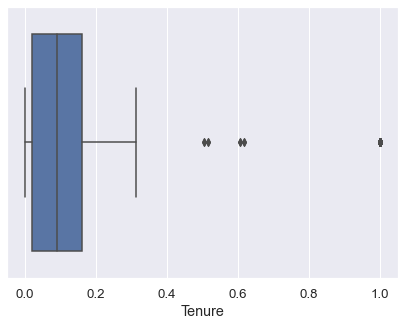

CC_Contacted_LY
 


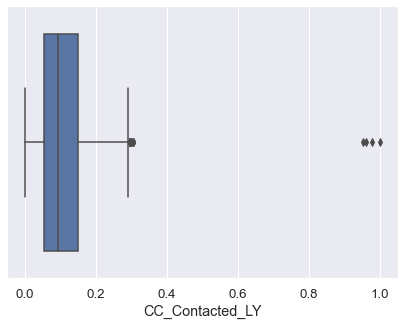

rev_per_month
 


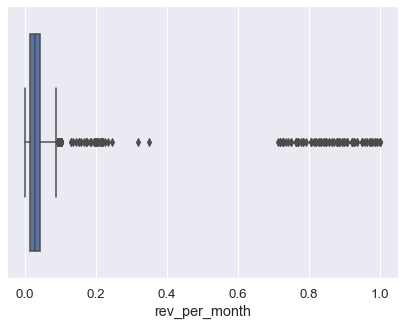

cashback
 


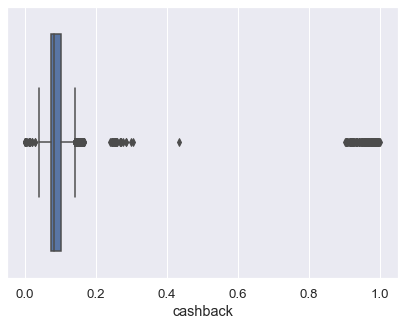

In [574]:
for i in churn_num:
    print(i)
    print(" ")
    sns.boxplot(churn_num[i])
    plt.show()

In [575]:
for i in churn_num.columns:
    LL, UL = replace_outlier(churn_num[i])
    churn_num[i] = np.where(churn_num[i]> UL, UL, churn_num[i])
    #churn_num[i] = np.where(churn_num[i]< LL, LL, churn_num[i])#Winsorization - Capping and Flooring

C:\Users\91702\AppData\Local\Temp\ipykernel_7408\3085814647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_num[i] = np.where(churn_num[i]> UL, UL, churn_num[i])


In [576]:
for i in churn_X_imputed.columns:
    LL, UL = replace_outlier(churn_X_imputed[i])
    churn_X_imputed[i] = np.where(churn_X_imputed[i]> UL, UL, churn_X_imputed[i])
    #churn_num[i] = np.where(churn_num[i]< LL, LL, churn_num[i])#Winsorization - Capping and Flooring

In [577]:
churn_X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  float64
 4   Gender                   11260 non-null  float64
 5   Service_Score            11260 non-null  float64
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  float64
 8   CC_Agent_Score           11260 non-null  float64
 9   Marital_Status           11260 non-null  float64
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  float64
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

# Univariate analysis(Numerical)

Tenure
 


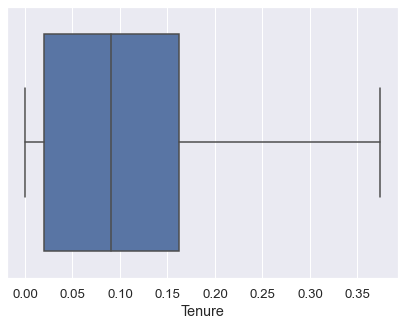

CC_Contacted_LY
 


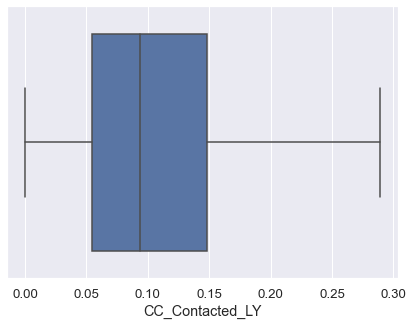

rev_per_month
 


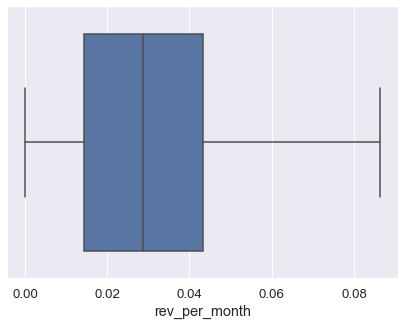

cashback
 


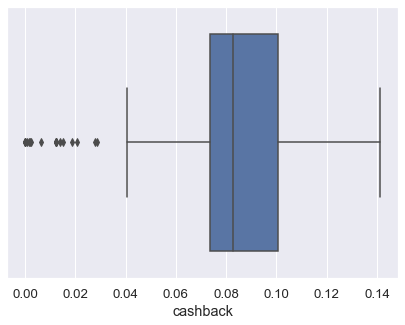

In [578]:
for i in churn_num:
    print(i)
    print(" ")
    sns.boxplot(churn_num[i])
    plt.show()

Tenure
 


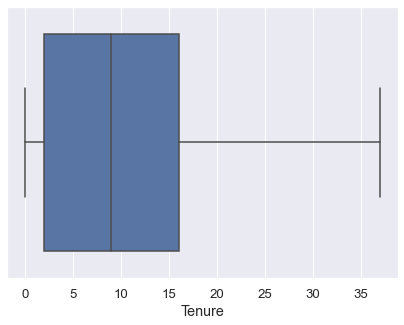

City_Tier
 


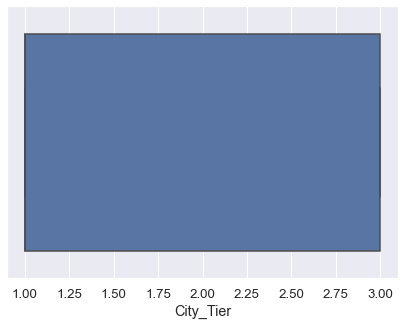

CC_Contacted_LY
 


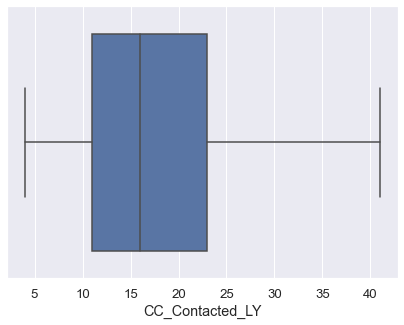

Payment
 


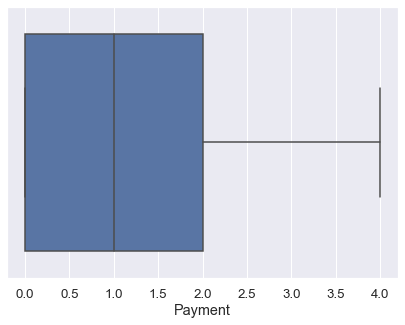

Gender
 


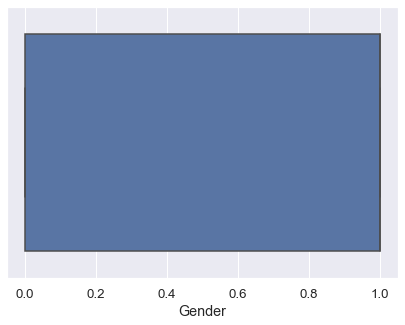

Service_Score
 


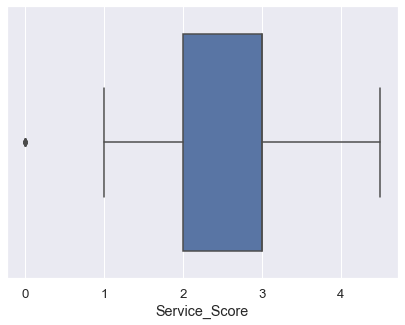

Account_user_count
 


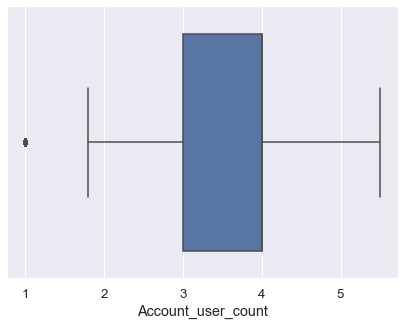

account_segment
 


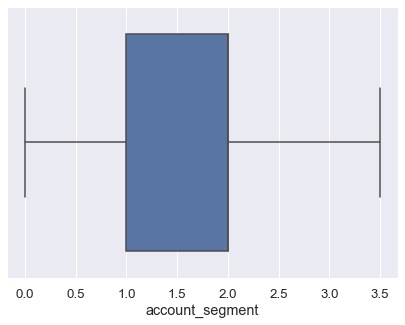

CC_Agent_Score
 


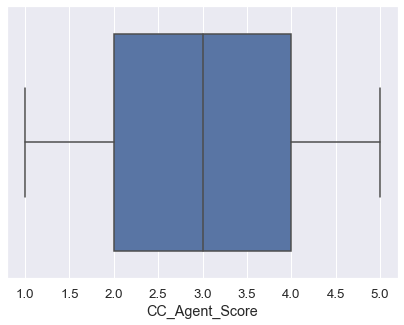

Marital_Status
 


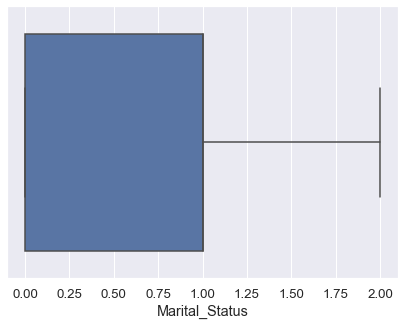

rev_per_month
 


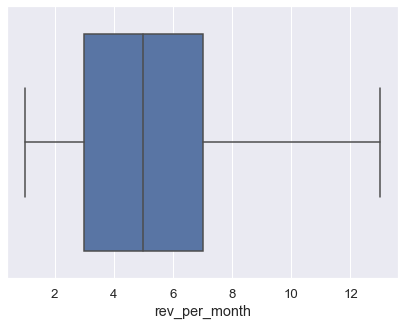

Complain_ly
 


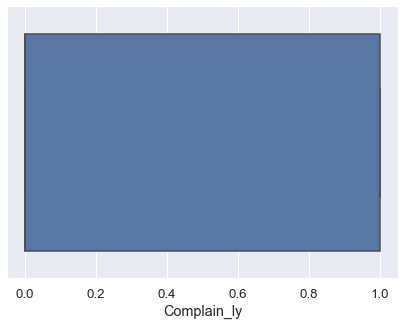

rev_growth_yoy
 


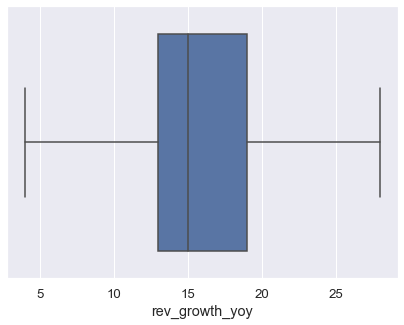

coupon_used_for_payment
 


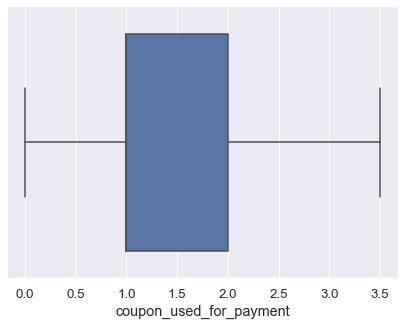

Day_Since_CC_connect
 


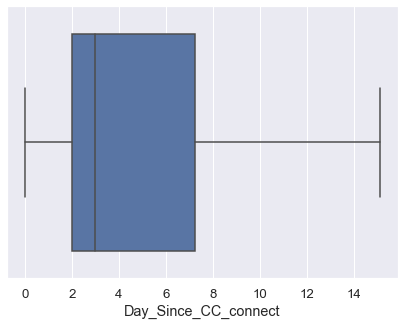

cashback
 


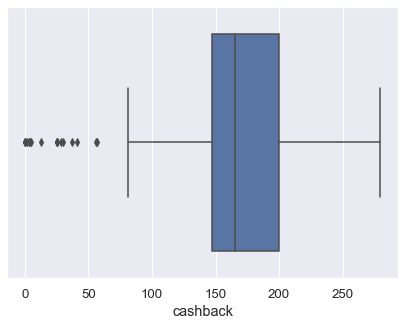

Login_device
 


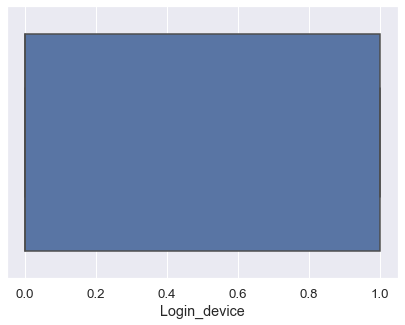

In [579]:
for i in churn_X_imputed:
    if churn_X_imputed[i].dtype == 'float':
        print(i)
        print(" ")
        sns.boxplot(churn_X_imputed[i])
        plt.show()

Tenure
 


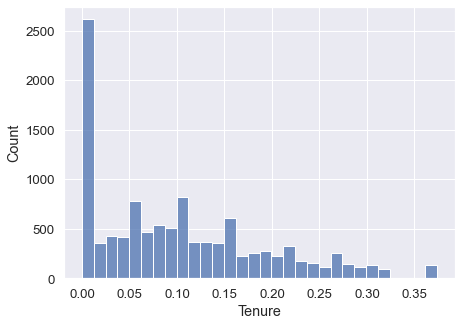

CC_Contacted_LY
 


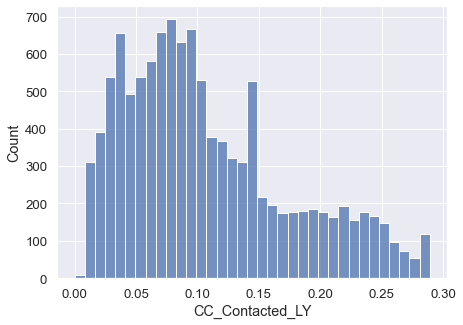

rev_per_month
 


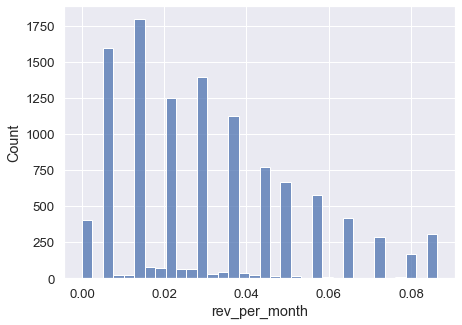

cashback
 


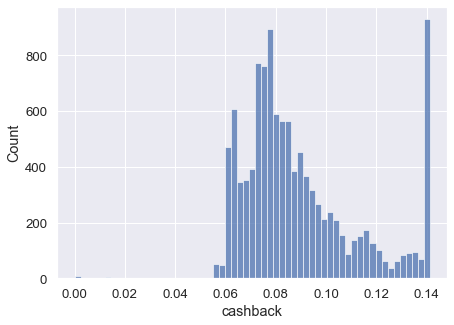

In [580]:
for i in churn_num:
    print(i)
    print(" ")
    sns.histplot(churn_num[i])
    plt.show()

# Univariate analysis (Categorical)

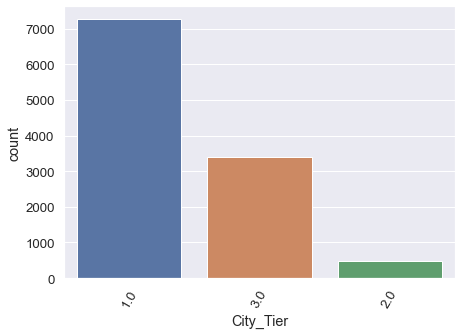

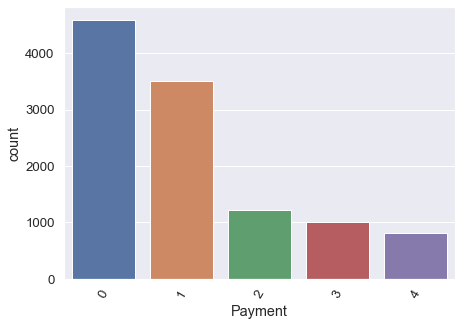

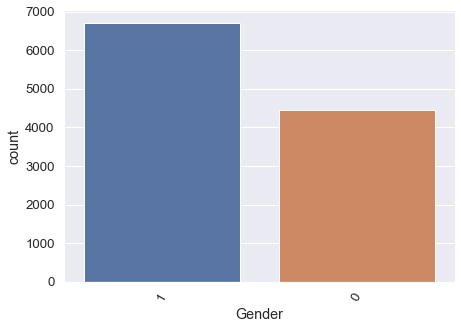

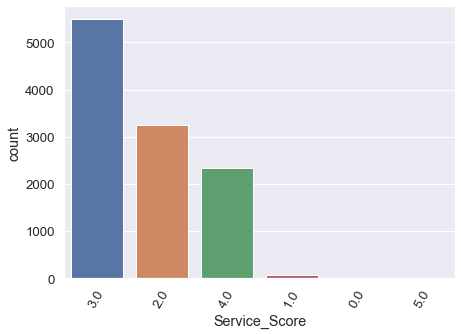

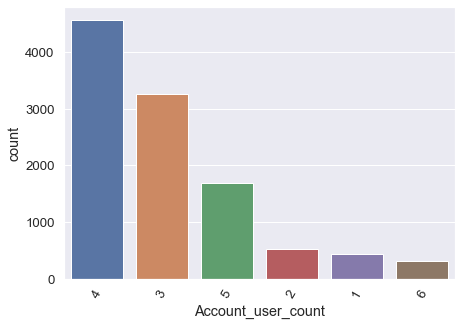

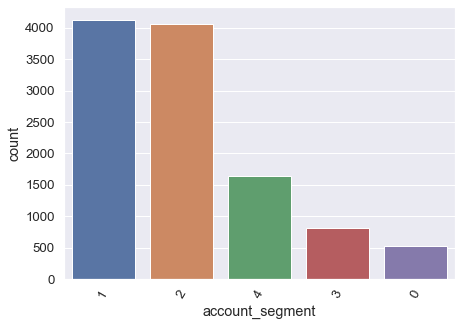

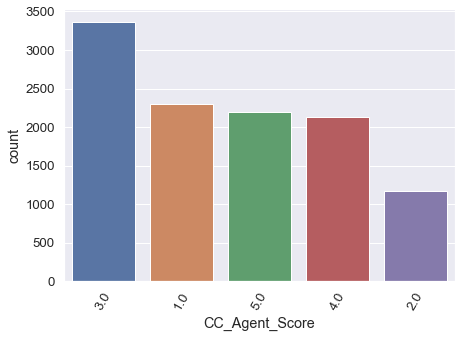

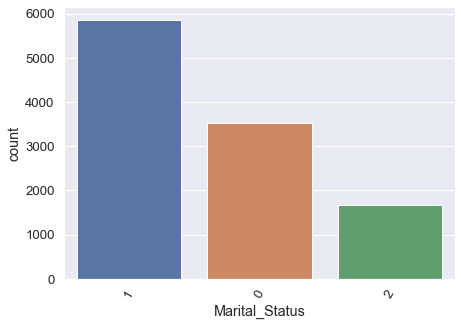

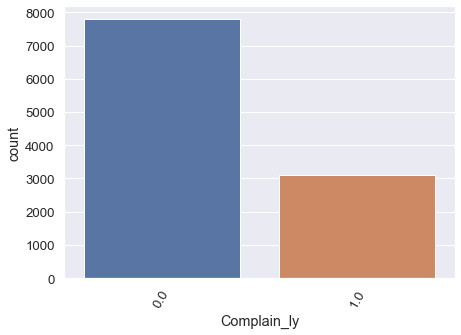

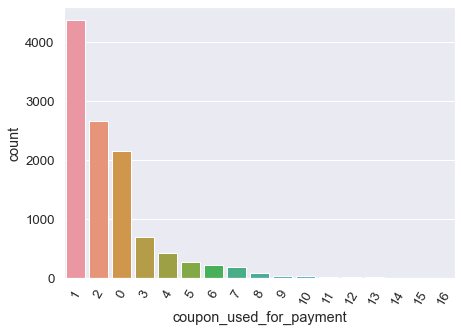

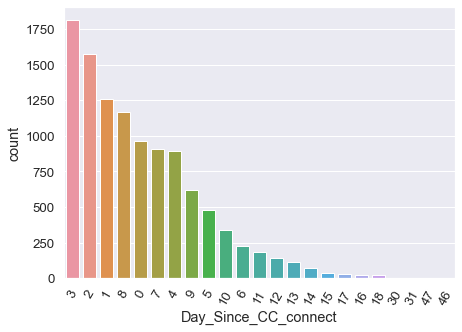

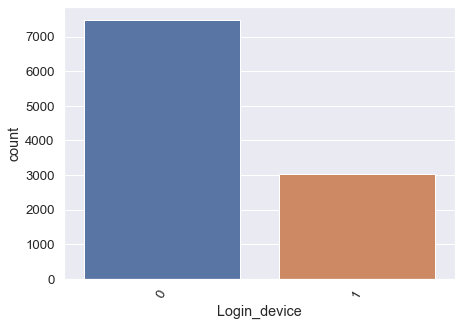

In [581]:
for i in cat:
    sns.countplot(churn[i],order = churn[i].value_counts().index)
    plt.xticks(rotation = 60)
    plt.show()

# Bivariate analysis

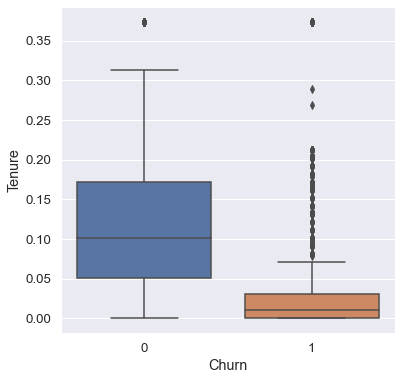

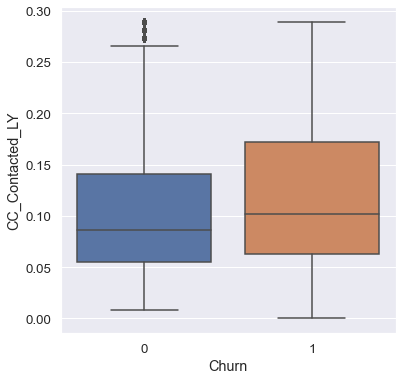

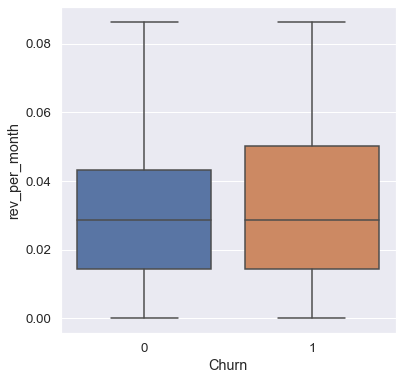

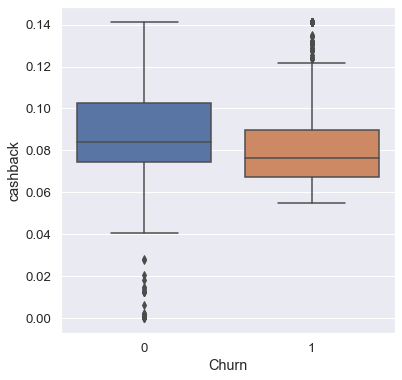

In [582]:
for i in churn_num:
    plt.figure(figsize=(6,6))
    sns.boxplot(x =churn['Churn'], y = i, data=churn_num)
    plt.show()

<AxesSubplot:>

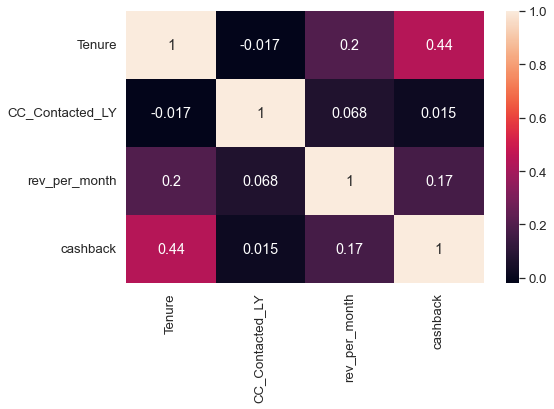

In [583]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1.2)
sns.heatmap(churn_num.corr(), annot=True)

<Figure size 360x360 with 0 Axes>

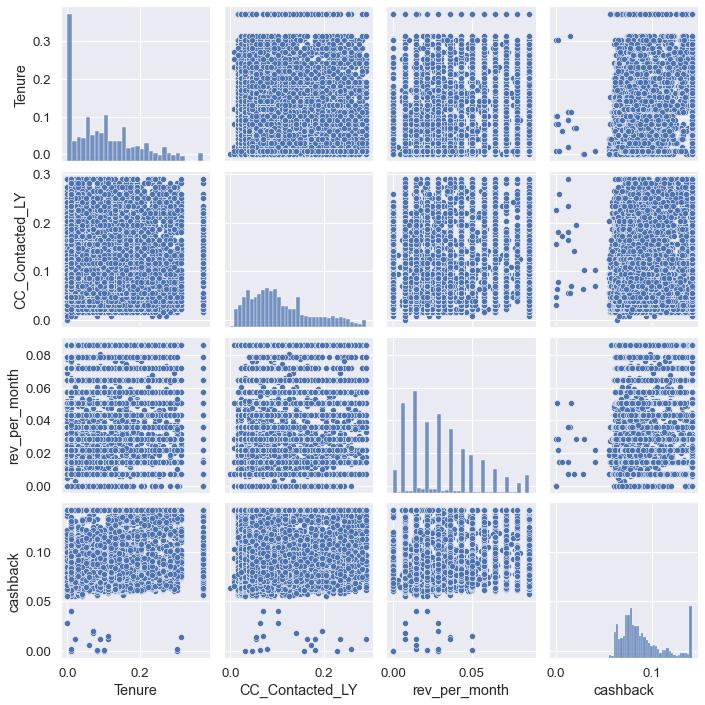

In [584]:
plt.figure(figsize=(5,5))
sns.pairplot(data=churn_num)

In [585]:
churn_X_imputed.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,0.0,0.0,3.0,3.0,2.0,2.0,0.0,9.0,1.0,11.0,1.0,5.0,160.0,0.0
1,0.0,1.0,8.0,4.0,1.0,3.0,4.0,1.0,3.0,0.0,7.0,1.0,15.0,0.0,0.0,121.0,0.0
2,0.0,1.0,30.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,6.0,1.0,14.0,0.0,3.0,141.6,0.0
3,0.0,3.0,15.0,0.0,1.0,2.0,4.0,2.0,5.0,0.0,8.0,0.0,23.0,0.0,3.0,134.0,0.0
4,0.0,1.0,12.0,1.0,1.0,2.0,3.0,1.0,5.0,0.0,3.0,0.0,11.0,1.0,3.0,130.0,0.0


In [586]:
churn_X_imputed.shape

(11260, 17)

In [587]:
churn_Y

0        1
1        1
2        1
3        1
4        1
        ..
11255    0
11256    0
11257    0
11258    0
11259    0
Name: Churn, Length: 11260, dtype: int32

In [588]:
X=churn_X_imputed_scaled
y=churn_Y

In [589]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1, stratify = y)

In [590]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (7882, 17)
X_test (3378, 17)
train_labels (7882,)
test_labels (3378,)


In [591]:
train_labels.value_counts(normalize ='True')

0    0.831642
1    0.168358
Name: Churn, dtype: float64

In [592]:
test_labels.value_counts(normalize ='True')

0    0.831557
1    0.168443
Name: Churn, dtype: float64

In [593]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 799 to 5569
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   7882 non-null   float64
 1   City_Tier                7882 non-null   float64
 2   CC_Contacted_LY          7882 non-null   float64
 3   Payment                  7882 non-null   float64
 4   Gender                   7882 non-null   float64
 5   Service_Score            7882 non-null   float64
 6   Account_user_count       7882 non-null   float64
 7   account_segment          7882 non-null   float64
 8   CC_Agent_Score           7882 non-null   float64
 9   Marital_Status           7882 non-null   float64
 10  rev_per_month            7882 non-null   float64
 11  Complain_ly              7882 non-null   float64
 12  rev_growth_yoy           7882 non-null   float64
 13  coupon_used_for_payment  7882 non-null   float64
 14  Day_Since_CC_connect  

In [594]:
X_train.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [595]:
X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
799,0.080808,0.0,0.062500,0.0,1.0,0.6,0.4,0.25,0.50,1.0,0.000000,1.0,0.416667,0.0625,0.042553,0.067601,0.0
7530,0.020202,1.0,0.117188,0.5,1.0,0.4,0.4,0.25,0.75,0.5,0.014388,0.0,0.458333,0.1250,0.042553,0.063095,0.0
6908,0.121212,1.0,0.171875,0.5,1.0,0.6,0.4,0.75,1.00,0.0,0.028777,0.0,0.375000,0.2500,0.212766,0.119680,0.0
3251,0.262626,1.0,0.046875,0.5,1.0,0.6,0.6,0.75,1.00,1.0,0.035971,0.0,0.333333,0.1250,0.361702,0.147221,0.0
5553,0.010101,1.0,0.093750,0.5,1.0,0.6,0.6,0.50,0.00,0.0,0.014388,0.0,0.458333,0.1250,0.170213,0.083125,0.0


In [596]:
train_labels.head()

799     0
7530    0
6908    0
3251    0
5553    0
Name: Churn, dtype: int32

In [597]:
# feature selection

In [598]:
from sklearn.feature_selection import SelectKBest, chi2
select_reg =  SelectKBest(chi2,k=12)
select_reg.fit(X_train, train_labels)               
X_train_new = select_reg.transform(X_train)
X_train_new.shape



(7882, 12)

In [599]:
from sklearn.feature_selection import SelectKBest, chi2
select_reg =  SelectKBest(chi2,k=12)
select_reg.fit(X_test, test_labels)               
X_test_new = select_reg.transform(X_test)
X_test_new.shape

(3378, 12)

In [600]:
kept_features = pd.DataFrame({'columns': X_train.columns,
                              'Kept': select_reg.get_support()})
kept_features

,columns,Kept
0,Tenure,True
1,City_Tier,True
2,CC_Contacted_LY,True
3,Payment,True
4,Gender,True
5,Service_Score,False
6,Account_user_count,True
7,account_segment,True
8,CC_Agent_Score,True
9,Marital_Status,True


In [601]:
X_train_new = X_train.iloc[:,select_reg.get_support()]
X_train_new

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Day_Since_CC_connect,Login_device
799,0.080808,0.0,0.062500,0.00,1.0,0.4,0.25,0.50,1.0,1.0,0.042553,0.0
7530,0.020202,1.0,0.117188,0.50,1.0,0.4,0.25,0.75,0.5,0.0,0.042553,0.0
6908,0.121212,1.0,0.171875,0.50,1.0,0.4,0.75,1.00,0.0,0.0,0.212766,0.0
3251,0.262626,1.0,0.046875,0.50,1.0,0.6,0.75,1.00,1.0,0.0,0.361702,0.0
5553,0.010101,1.0,0.093750,0.50,1.0,0.6,0.50,0.00,0.0,0.0,0.170213,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11103,0.010101,0.5,0.179688,1.00,1.0,0.8,0.25,1.00,0.5,1.0,0.021277,0.0
6591,0.232323,0.0,0.218750,0.25,1.0,0.8,0.75,0.00,0.0,1.0,0.191489,1.0
3047,0.010101,1.0,0.023438,0.75,0.0,0.8,0.25,0.75,0.0,1.0,0.063830,1.0
7159,0.262626,0.0,0.171875,0.25,0.0,0.0,0.50,1.00,0.5,0.0,0.063830,0.0


In [602]:
X_test_new = X_test.iloc[:,select_reg.get_support()]
X_test_new

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Day_Since_CC_connect,Login_device
6888,0.090909,0.0,0.125000,0.00,1.0,0.0,0.25,0.75,0.5,0.0,0.042553,1.0
467,0.202020,0.0,0.031250,1.00,0.0,0.4,0.75,0.25,1.0,1.0,0.000000,0.0
2347,0.080808,0.0,0.156250,0.00,1.0,0.4,1.00,0.00,0.0,0.0,0.042553,1.0
1794,0.121212,0.0,0.078125,0.00,0.0,0.4,0.25,0.50,0.5,0.0,0.148936,1.0
3125,0.010101,0.0,0.140625,0.25,1.0,0.6,1.00,0.50,1.0,1.0,0.170213,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
708,0.000000,0.0,0.062500,0.00,1.0,0.6,0.25,0.50,1.0,0.0,0.042553,0.0
3702,0.010101,1.0,0.023438,0.00,0.0,1.0,0.25,0.50,0.0,0.0,0.021277,1.0
8064,0.101010,0.0,0.132812,0.25,1.0,0.4,0.50,0.00,0.5,0.0,0.148936,0.0
7643,0.010101,0.0,0.125000,0.25,0.0,0.4,0.25,0.50,0.5,0.0,0.042553,0.0


# Hierarchichal clustering

In [603]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [122]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,0.0,0.0,3.0,3.0,2.0,2.0,0.0,9.0,1.0,11.0,1.0,5.0,160.0,0.0
1,0.0,1.0,8.0,4.0,1.0,3.0,4.0,1.0,3.0,0.0,7.0,1.0,15.0,0.0,0.0,121.0,0.0
2,0.0,1.0,30.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,6.0,1.0,14.0,0.0,3.0,141.6,0.0
3,0.0,3.0,15.0,0.0,1.0,2.0,4.0,2.0,5.0,0.0,8.0,0.0,23.0,0.0,3.0,134.0,0.0
4,0.0,1.0,12.0,1.0,1.0,2.0,3.0,1.0,5.0,0.0,3.0,0.0,11.0,1.0,3.0,130.0,0.0


In [2763]:
wardlink = linkage(X, method = 'ward')

MemoryError: unable to allocate array data.

In [ ]:
dend = dendrogram(wardlink)

In [ ]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

In [2764]:
X['clusters'] = clusters

In [118]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,0.0,0.0,3.0,3.0,2.0,2.0,0.0,9.0,1.0,11.0,1.0,5.0,160.0,0.0
1,0.0,1.0,8.0,4.0,1.0,3.0,4.0,1.0,3.0,0.0,7.0,1.0,15.0,0.0,0.0,121.0,0.0
2,0.0,1.0,30.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,6.0,1.0,14.0,0.0,3.0,141.6,0.0
3,0.0,3.0,15.0,0.0,1.0,2.0,4.0,2.0,5.0,0.0,8.0,0.0,23.0,0.0,3.0,134.0,0.0
4,0.0,1.0,12.0,1.0,1.0,2.0,3.0,1.0,5.0,0.0,3.0,0.0,11.0,1.0,3.0,130.0,0.0


# Cluster frequency

In [2766]:
X.clusters.value_counts().sort_index()

1    1314
2    9946
Name: clusters, dtype: int64

In [2767]:
X.iloc[:,1:18]

,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,clusters
0,3.0,6.0,0.0,0.0,3.0,3.0,2.0,2.0,0.0,9.0,1.0,11.0,1.0,5.0,160.0,0.0,2
1,1.0,8.0,4.0,1.0,3.0,4.0,1.0,3.0,0.0,7.0,1.0,15.0,0.0,0.0,121.0,0.0,2
2,1.0,30.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,6.0,1.0,14.0,0.0,3.0,141.6,0.0,2
3,3.0,15.0,0.0,1.0,2.0,4.0,2.0,5.0,0.0,8.0,0.0,23.0,0.0,3.0,134.0,0.0,2
4,1.0,12.0,1.0,1.0,2.0,3.0,1.0,5.0,0.0,3.0,0.0,11.0,1.0,3.0,130.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,1.0,34.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,9.0,0.0,19.0,1.0,4.0,154.0,1.0,2
11256,1.0,19.0,1.0,1.0,3.0,5.0,3.5,5.0,1.0,7.0,0.0,16.0,1.0,8.0,227.0,0.0,2
11257,1.0,14.0,0.0,1.0,3.0,2.0,2.0,4.0,1.0,7.0,1.0,22.0,1.0,4.0,191.0,0.0,2
11258,3.0,11.0,1.0,1.0,4.0,5.0,2.0,4.0,1.0,7.0,0.0,16.0,2.0,9.0,180.0,1.0,2


In [2768]:
aggdata=X.iloc[:,0:18].groupby('clusters').mean()
aggdata['Freq']=X.clusters.value_counts().sort_index()
aggdata

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Freq
clusters,,,,,,,,,,,,,,,,,,
1,19.167732,1.540944,16.899239,1.018721,0.581735,2.915373,3.720700,1.737367,3.097565,0.945967,5.967732,0.278691,16.093607,1.903729,6.587405,275.190183,0.217504,1314
2,9.079610,1.669013,17.946310,1.112970,0.604162,2.901337,3.671828,1.842359,3.062417,0.817454,5.198291,0.286950,16.206153,1.419153,4.326976,165.707561,0.296763,9946


In [2769]:
X.iloc[:,1]

0        3.0
1        1.0
2        1.0
3        3.0
4        1.0
        ... 
11255    1.0
11256    1.0
11257    1.0
11258    3.0
11259    1.0
Name: City_Tier, Length: 11260, dtype: float64

NameError: name 'hue' is not defined

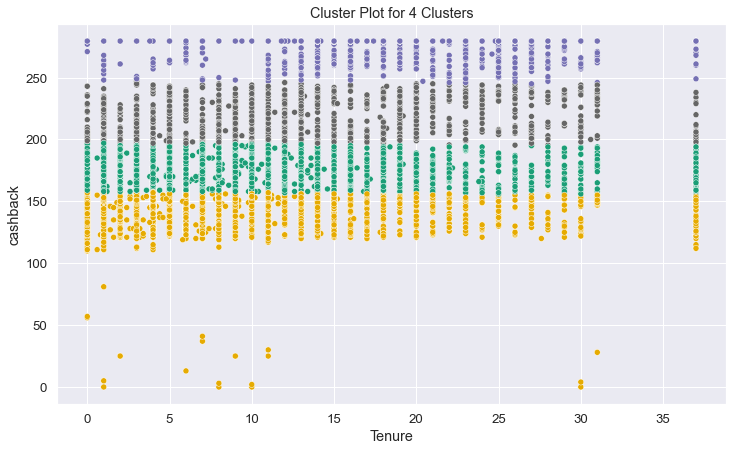

In [2770]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,15], hue=KMeans(n_clusters=
4, random_state=0).fit(X[['Tenure','cashback']]).labels_, palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 4 Clusters')
plt.colorbar(hue)
plt.show()



In [123]:
cols=X.columns

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5):
    cols = X.columns
variables = np.arange(X.shape[1])
dropped=True
while dropped:
    dropped=False
    c = X[cols[variables]].values
    vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > 5:        
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        
        variables = np.delete(variables, maxloc)        
        dropped=True
        

print('Remaining variables:')
print(X.columns[variables])


dropping 'cashback' at index: 15
dropping 'Service_Score' at index: 5
dropping 'rev_growth_yoy' at index: 11
dropping 'Account_user_count' at index: 5
dropping 'account_segment' at index: 5
Remaining variables:
Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'Login_device'],
      dtype='object')


In [206]:
X_train1=X_train.drop(['cashback','Service_Score','rev_growth_yoy','Account_user_count','account_segment'] ,axis = 1)

In [207]:
X_test1=X_test.drop(['cashback','Service_Score','rev_growth_yoy','Account_user_count','account_segment'] ,axis = 1)

In [208]:
Default_concat = pd.concat([X, y], axis = 1)

In [209]:
Default_concat.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn
0,4.0,3.0,6.0,0.0,0.0,3.0,3.0,2.0,2.0,0.0,9.0,1.0,11.0,1.0,5.0,160.0,0.0,1
1,0.0,1.0,8.0,4.0,1.0,3.0,4.0,1.0,3.0,0.0,7.0,1.0,15.0,0.0,0.0,121.0,0.0,1
2,0.0,1.0,30.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,6.0,1.0,14.0,0.0,3.0,141.6,0.0,1
3,0.0,3.0,15.0,0.0,1.0,2.0,4.0,2.0,5.0,0.0,8.0,0.0,23.0,0.0,3.0,134.0,0.0,1
4,0.0,1.0,12.0,1.0,1.0,2.0,3.0,1.0,5.0,0.0,3.0,0.0,11.0,1.0,3.0,130.0,0.0,1


In [210]:
f1='Churn ~Tenure+City_Tier+CC_Contacted_LY+Payment+Gender+CC_Agent_Score+Marital_Status+rev_per_month+Complain_ly+coupon_used_for_payment+Day_Since_CC_connect+Login_device'

In [211]:
import statsmodels.formula.api as SM
model_1 = SM.logit(formula = f1,data=Default_concat).fit()

Optimization terminated successfully.
         Current function value: 0.316779
         Iterations 8


In [212]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                11260
Model:                          Logit   Df Residuals:                    11247
Method:                           MLE   Df Model:                           12
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.3012
Time:                        15:52:22   Log-Likelihood:                -3566.9
converged:                       True   LL-Null:                       -5104.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.1788      0.152    -20.929      0.000      -3.477      -2.881
Tenure                     -0.1793      0.006    -29.712      0.000      -0.191      -0.167
City_Tier                   0.2566      0.032      7.952      0.000       0.193       0.320
CC_Contacted_LY             0.0225      0.004      6.367      0.000       0.016       0.029
Payment                     0.0590      0.024      2.464      0.014       0.012       0.106
Gender                      0.2785      0.063      4.432      0.000       0.155       0.402
CC_Agent_Score              0.2713      0.023     12.055      0.000       0.227       0.315
Marital_Status             -0.5503      0.047    -11.774      0.000      -0.642      -0.459
rev_per_month               0.1179      0.010     11.423      0.000       0.098       0.138
Complain_ly                 1.6150      0.063     25.497      0.000       1.491       1.739
coupon_used_for_payment     0.2236      0.031      7.153      0.000       0.162       0.285
Day_Since_CC_connect       -0.1037      0.011     -9.477      0.000      -0.125      -0.082
Login_device                0.3768      0.067      5.665      0.000       0.246       0.507
===========================================================================================
"""

In [213]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.2988431177139361


In [214]:
y_predict_train = model_1.predict(X_train1)
y_predict_train

799      0.087412
7530     0.306719
6908     0.131492
3251     0.001324
5553     0.169417
           ...   
11103    0.910995
6591     0.025570
3047     0.787990
7159     0.002510
5569     0.026798
Length: 7882, dtype: float64

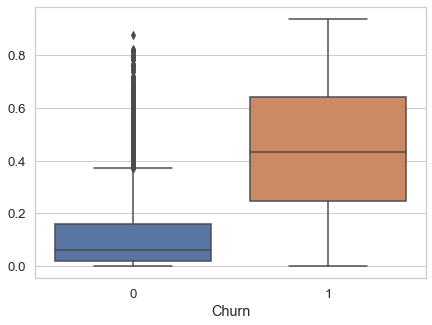

In [215]:
import seaborn as sns 
sns.boxplot(x=y,y=y_predict_train)
plt.xlabel('Churn');

In [216]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels,y_predict_train)

In [217]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2411763000846025

In [218]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.25:
        a=1
    else:
        a=0
    y_class_pred.append(a)

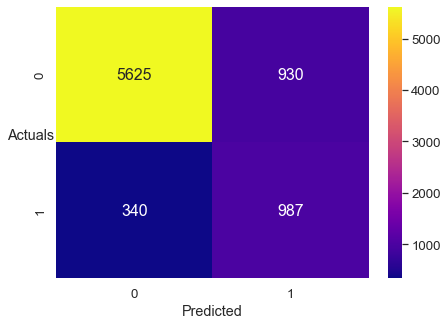

In [219]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(train_labels,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [220]:
print(metrics.classification_report(train_labels,y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6555
           1       0.51      0.74      0.61      1327

    accuracy                           0.84      7882
   macro avg       0.73      0.80      0.75      7882
weighted avg       0.87      0.84      0.85      7882



# Setting the Class Weight Parameter and Scoring based on f1

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

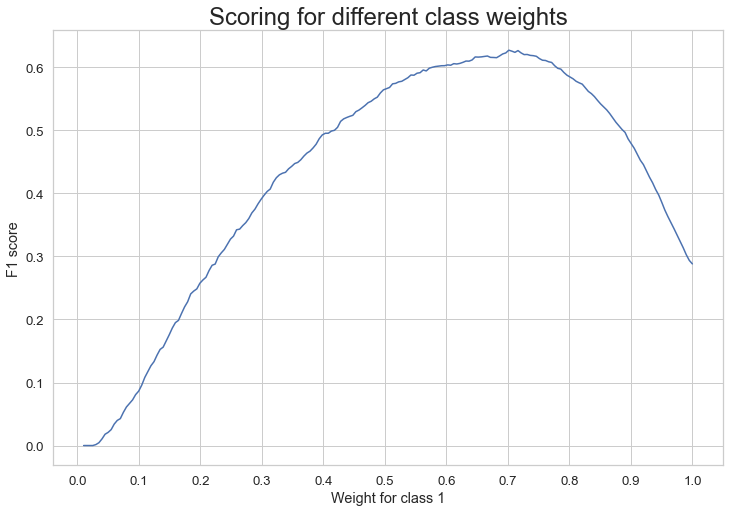

In [184]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train,train_labels)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [188]:
weigh_data.sort_values(by=['score'],ascending=False)

,score,weight
60,0.627255,0.701508
57,0.626604,0.716432
59,0.625706,0.706482
58,0.623831,0.711457
56,0.622951,0.721407
...,...,...
195,0.001504,0.029899
196,0.000000,0.024925
197,0.000000,0.019950
198,0.000000,0.014975


In [196]:
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.298492, 1: 0.701508})
lr.fit(X_train,train_labels)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = lr.score(X_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(test_labels, pred_test)
print('Classification Report','\n',metrics.classification_report(test_labels, pred_test))

The f1 score for the testing data: 1.0
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2809
           1       0.58      0.64      0.61       569

    accuracy                           0.86      3378
   macro avg       0.75      0.77      0.76      3378
weighted avg       0.87      0.86      0.86      3378



# Churn model prediction

# Logistic regression

In [608]:
# Logistic regression simple model

from sklearn.linear_model import LogisticRegression
LR_model_S = LogisticRegression()
LR_model_S.fit(X_train_new,train_labels)

y_predict_train_LRS = LR_model_S.predict(X_train_new)
y_predict_test_LRS = LR_model_S.predict(X_test_new)

In [609]:
LRS_modelscore_train = LR_model_S.score(X_train_new,train_labels)
print('Accuracy Score is ',LRS_modelscore_train)

Accuracy Score is  0.8776960162395331


In [610]:
# Modelscore on test data
LRS_modelscore_test = LR_model_S.score(X_test_new, test_labels)
print('Accuracy Score is ',LRS_modelscore_test)

Accuracy Score is  0.8801065719360568


In [611]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(train_labels, y_predict_train_LRS),'\n')
print('Classification Report','\n',metrics.classification_report(train_labels, y_predict_train_LRS))

Confusion Matrix 
 [[6438  117]
 [ 847  480]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      6555
           1       0.80      0.36      0.50      1327

    accuracy                           0.88      7882
   macro avg       0.84      0.67      0.71      7882
weighted avg       0.87      0.88      0.86      7882



In [612]:
# metrics on test data
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels, y_predict_test_LRS),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels, y_predict_test_LRS))

Confusion Matrix 
 [[2767   42]
 [ 363  206]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      2809
           1       0.83      0.36      0.50       569

    accuracy                           0.88      3378
   macro avg       0.86      0.67      0.72      3378
weighted avg       0.88      0.88      0.86      3378



In [614]:

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_new,train_labels)

y_predict_train_LRS1 = logreg.predict(X_train_new)
y_predict_test_LRS1 = logreg.predict(X_test_new)

In [616]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(train_labels, y_predict_train_LRS1),'\n')
print('Classification Report','\n',metrics.classification_report(train_labels, y_predict_train_LRS1))

Confusion Matrix 
 [[4985 1570]
 [ 272 1055]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84      6555
           1       0.40      0.80      0.53      1327

    accuracy                           0.77      7882
   macro avg       0.68      0.78      0.69      7882
weighted avg       0.86      0.77      0.79      7882



In [620]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels, y_predict_test_LRS1),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels, y_predict_test_LRS1))

Confusion Matrix 
 [[2128  681]
 [ 142  427]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      2809
           1       0.39      0.75      0.51       569

    accuracy                           0.76      3378
   macro avg       0.66      0.75      0.67      3378
weighted avg       0.84      0.76      0.78      3378



In [621]:
plot_decision_regions(X_train_new, y, feat_1 = 15, feat_2 = 0, classifier = logreg)

ValueError: Found input variables with inconsistent numbers of samples: [7882, 11260]

# Logistic regression model tuning

In [622]:
grid={'penalty':['l2','none'],
      'solver':['saga','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [623]:
LR_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [624]:
from sklearn.model_selection import train_test_split,GridSearchCV
grid_search = GridSearchCV(estimator = LR_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [625]:
grid_search.fit(X_train_new,train_labels)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['saga', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [626]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'saga', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='saga')


In [627]:
best_model = grid_search.best_estimator_

In [629]:
ytrain_predict = best_model.predict(X_train_new)
ytest_predict = best_model.predict(X_test_new)

In [630]:
LRG_modelscore_train = best_model.score(X_train_new,train_labels)
print('Accuracy Score is ',LRG_modelscore_train)

Accuracy Score is  0.8794722151738138


In [631]:
LRG_modelscore_test = best_model.score(X_test_new,test_labels)
print('Accuracy Score is ',LRG_modelscore_test)

Accuracy Score is  0.8848431024274719


In [632]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(train_labels, ytrain_predict),'\n')
print('Classification Report','\n',metrics.classification_report(train_labels, ytrain_predict))

Confusion Matrix 
 [[6394  161]
 [ 789  538]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      6555
           1       0.77      0.41      0.53      1327

    accuracy                           0.88      7882
   macro avg       0.83      0.69      0.73      7882
weighted avg       0.87      0.88      0.86      7882



In [633]:
# Logistic regression on test data
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels, ytest_predict),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels, ytest_predict))

Confusion Matrix 
 [[2757   52]
 [ 337  232]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2809
           1       0.82      0.41      0.54       569

    accuracy                           0.88      3378
   macro avg       0.85      0.69      0.74      3378
weighted avg       0.88      0.88      0.87      3378



In [634]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
LRG_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(LRG_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
LRG_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
LRG_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
LRG_train_f1=round(df.loc["1"][2],2)


print ('LRG_train_precision ',LRG_train_precision)
print ('LRG_train_recall ',LRG_train_recall)
print ('LRG_train_f1 ',LRG_train_f1)

LRG_train_precision  0.77
LRG_train_recall  0.41
LRG_train_f1  0.53


In [635]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
LRG_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(LRG_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
LRG_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
LRG_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
LRG_test_f1=round(df.loc["1"][2],2)


print ('LRG_test_precision ',LRG_test_precision)
print ('LRG_test_recall ',LRG_test_recall)
print ('LRG_test_f1 ',LRG_test_f1)

LRG_test_precision  0.82
LRG_test_recall  0.41
LRG_test_f1  0.54


In [636]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LRG_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % LRG_train_auc)
# calculate roc curve
LRG_train_fpr, LRG_train_tpr, LRG_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LRG_train_fpr, LRG_train_tpr)

ValueError: X has 17 features, but LogisticRegression is expecting 12 features as input.

In [637]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_model.predict_proba(X_test_new)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LRG_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % LRG_test_auc)
# calculate roc curve
LRG_test_fpr, LRG_test_tpr, LRG_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LRG_test_fpr, LRG_test_tpr)

ValueError: X has 17 features, but LogisticRegression is expecting 12 features as input.

# Naive Bayes model

In [638]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
Naive_model = GaussianNB()

Naive_model.fit(X_train_new,train_labels)

GaussianNB()

In [639]:
y_train_predict = Naive_model.predict(X_train_new)
y_test_predict=Naive_model.predict(X_test_new)
Naive_score_train = Naive_model.score(X_train_new, train_labels) 
Naive_score_test = Naive_model.score(X_test_new, test_labels) 
## Accuracy
print(Naive_score_train)

print(metrics.confusion_matrix(train_labels, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(train_labels, y_train_predict))     ## classification_report

0.8674194366911951
[[6363  192]
 [ 853  474]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6555
           1       0.71      0.36      0.48      1327

    accuracy                           0.87      7882
   macro avg       0.80      0.66      0.70      7882
weighted avg       0.85      0.87      0.85      7882



In [640]:
# Naive prediction on test data
print(Naive_score_test)
print(metrics.confusion_matrix(test_labels, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(test_labels, y_test_predict))     ## classification_report

0.8697454114860864
[[2744   65]
 [ 375  194]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2809
           1       0.75      0.34      0.47       569

    accuracy                           0.87      3378
   macro avg       0.81      0.66      0.70      3378
weighted avg       0.86      0.87      0.85      3378



In [641]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Naive_metrics=classification_report(train_labels, y_train_predict,output_dict=True)
df=pd.DataFrame(Naive_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Naive_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Naive_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Naive_train_f1=round(df.loc["1"][2],2)


print ('Naive_train_precision ',Naive_train_precision)
print ('Naive_train_recall ',Naive_train_recall)
print ('Naive_train_f1 ',Naive_train_f1)

Naive_train_precision  0.71
Naive_train_recall  0.36
Naive_train_f1  0.48


In [2795]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Naive_metrics=classification_report(test_labels, y_test_predict,output_dict=True)
df=pd.DataFrame(Naive_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Naive_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Naive_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Naive_test_f1=round(df.loc["1"][2],2)


print ('Naive_test_precision ',Naive_test_precision)
print ('Naive_test_recall ',Naive_test_recall)
print ('Naive_test_f1 ',Naive_test_f1)

Naive_test_precision  0.59
Naive_test_recall  0.57
Naive_test_f1  0.58


AUC: 0.829


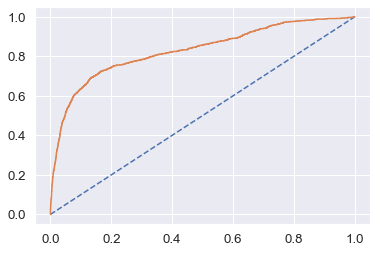

In [2796]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Naive_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)

AUC: 0.803


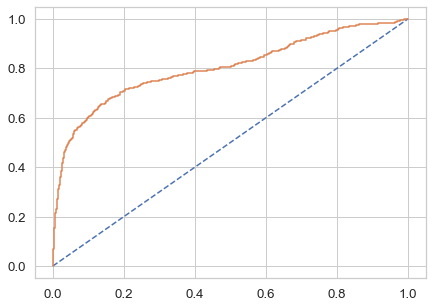

In [227]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Naive_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)

# Naive bayes hyper parameter tuning

In [642]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [643]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train,train_labels)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.004328761281083057)


In [645]:
y_pred = nbModel_grid.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [646]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(test_labels, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(test_labels, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(test_labels, y_pred), ": is the f1 score")

[[2724   85]
 [ 400  169]] : is the confusion matrix
0.8564239194789817 : is the accuracy score
0.6653543307086615 : is the precision score
0.29701230228471004 : is the recall score
0.41069258809234505 : is the f1 score


C:\Users\91702\anaconda3\envs\Python_JP\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\91702\AppData\Local\Temp\ipykernel_7788\672703795.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks = [0, 1])


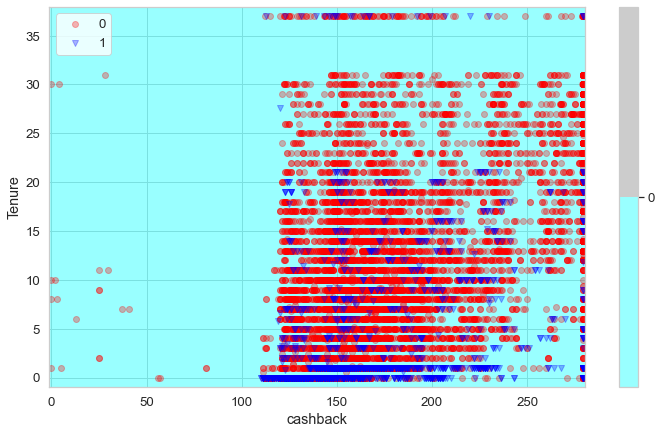

CPU times: total: 1.41 s
Wall time: 2.26 s


In [248]:
%%time
plot_decision_regions(X, y, feat_1 = 15, feat_2 = 0, classifier = Naive_model)

# CART

# Descision tree(simple model)

In [343]:
from sklearn.tree import DecisionTreeClassifier
DTree_Model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
DTree_Model.fit(X_train,train_labels)


DecisionTreeClassifier(random_state=1)

In [344]:
DT_modelscore_train=DTree_Model.score(X_train,train_labels)
DT_modelscore_test=DTree_Model.score(X_test,test_labels)
print(DTree_Model.score(X_train,train_labels))
print(DTree_Model.score(X_test,test_labels))

1.0
0.9564831261101243


In [345]:
ytrainpredict = DTree_Model.predict(X_train)
ytestpredict = DTree_Model.predict(X_test)

In [245]:
print(metrics.classification_report(train_labels, ytrainpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [249]:
print(metrics.classification_report(test_labels, ytestpredict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2809
           1       0.89      0.85      0.87       569

    accuracy                           0.96      3378
   macro avg       0.93      0.91      0.92      3378
weighted avg       0.96      0.96      0.96      3378



In [351]:

dt = DecisionTreeClassifier(class_weight= 'balanced', max_depth= 11, random_state=1)
dt.fit(X_train_new,train_labels)






DecisionTreeClassifier(class_weight='balanced', max_depth=11, random_state=1)

In [352]:
ytestpredict=dt.predict(X_test_new)


In [353]:
ytrainpredict=dt.predict(X_train_new)

In [355]:
print(metrics.classification_report(train_labels, ytrainpredict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6555
           1       0.79      0.98      0.87      1327

    accuracy                           0.95      7882
   macro avg       0.89      0.96      0.92      7882
weighted avg       0.96      0.95      0.95      7882



In [356]:
print(metrics.classification_report(test_labels, ytestpredict))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2809
           1       0.72      0.90      0.80       569

    accuracy                           0.92      3378
   macro avg       0.85      0.92      0.88      3378
weighted avg       0.94      0.92      0.93      3378



C:\Users\91702\anaconda3\envs\Python_JP\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91702\AppData\Local\Temp\ipykernel_7788\672703795.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks = [0, 1])


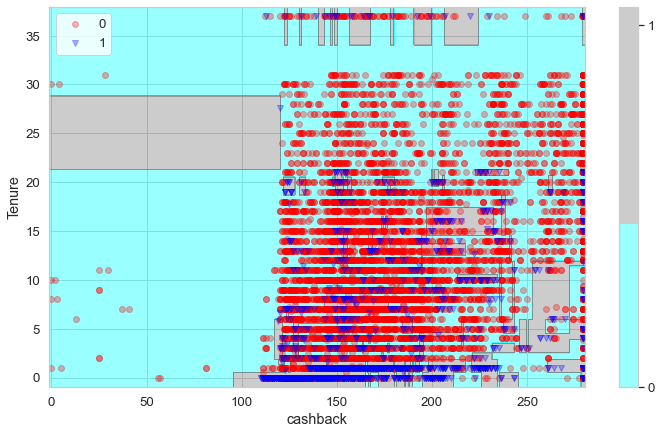

CPU times: total: 1.36 s
Wall time: 1.93 s


In [309]:
%%time
plot_decision_regions(X, y, feat_1 = 15, feat_2 = 0, classifier = dt)

In [2803]:
# We can see that descision tree is clearly overfitting the data

# Descision tree using model tuning

In [232]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],# 3,5,7,9
    'min_samples_leaf': [50,100,150], # 1-3% 50-150
    'min_samples_split': [450,150,300] # 150 - 450
}

dtcl = DecisionTreeClassifier(class_weight= 'balanced')

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [233]:
grid_search.fit(X_train_new, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=50, min_samples_split=150)

In [235]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train_new.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.646336
CC_Agent_Score        0.088615
Complain_ly           0.080774
Day_Since_CC_connect  0.056470
account_segment       0.040394
City_Tier             0.032192
Marital_Status        0.023625
Account_user_count    0.015541
Payment               0.012885
Login_device          0.003168


In [274]:
# considering the lowest values in few variables of feature importance,few variables were dropped

In [283]:
DTree_modelscore_train=best_grid.score(X_train,train_labels)
DTree_modelscore_train


0.8405227099720883

In [284]:

DTree_modelscore_test=best_grid.score(X_test,test_labels)
DTree_modelscore_test

0.829780935464772

In [236]:
ytrain_predict = best_grid.predict(X_train_new)
ytest_predict = best_grid.predict(X_test)

ValueError: X has 17 features, but DecisionTreeClassifier is expecting 10 features as input.

In [238]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6555
           1       0.52      0.87      0.66      1327

    accuracy                           0.85      7882
   macro avg       0.75      0.86      0.78      7882
weighted avg       0.90      0.85      0.86      7882



In [287]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2809
           1       0.50      0.85      0.63       569

    accuracy                           0.83      3378
   macro avg       0.73      0.84      0.76      3378
weighted avg       0.89      0.83      0.85      3378



In [2814]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(Cart_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Cart_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Cart_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Cart_train_f1=round(df.loc["1"][2],2)


print ('Cart_train_precision ',Cart_train_precision)
print ('Cart_train_recall ',Cart_train_recall)
print ('Cart_train_f1 ',Cart_train_f1)

Cart_train_precision  0.71
Cart_train_recall  0.52
Cart_train_f1  0.6


In [2815]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(Cart_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Cart_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Cart_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Cart_test_f1=round(df.loc["1"][2],2)


print ('Cart_test_precision ',Cart_test_precision)
print ('Cart_test_recall ',Cart_test_recall)
print ('Cart_test_f1 ',Cart_test_f1)



Cart_test_precision  0.7
Cart_test_recall  0.53
Cart_test_f1  0.6


AUC: 0.914


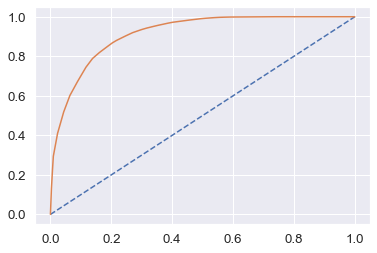

In [2816]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % Cart_train_auc)
# calculate roc curve
Cart_train_fpr, Cart_train_tpr, Cart_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Cart_train_fpr, Cart_train_tpr)

AUC: 0.901


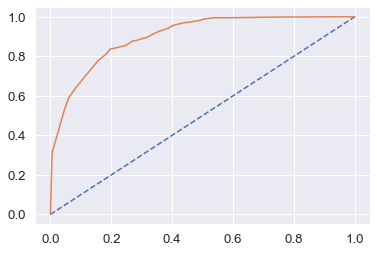

In [2817]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % Cart_test_auc)
# calculate roc curve
Cart_test_fpr, Cart_test_tpr, Cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Cart_test_fpr, Cart_test_tpr)

# Random Forest Classifier for bagging

In [358]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(X_train,train_labels)

y_pred_test=clfRF.predict(X_test)
y_pred_train=clfRF.predict(X_train)
model_scoreRF_test = clfRF.score(X_test,test_labels)                                
model_scoreRF_train = clfRF.score(X_train,train_labels)

In [359]:
print(model_scoreRF_test)

print(metrics.confusion_matrix(test_labels, y_pred_test))

0.9766133806986382
[[2799   10]
 [  69  500]]


In [360]:
print(model_scoreRF_train)
y_pred_train=clfRF.predict(X_train)
print(metrics.confusion_matrix(train_labels, y_pred_train))

1.0
[[6555    0]
 [   0 1327]]


# Bagging classifier

In [361]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=clfRF,n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train,train_labels)

In [362]:
y_predict_test = bgcl.predict(X_test)

print(bgcl.score(X_test,test_labels))
print(metrics.confusion_matrix(test_labels, y_predict_test))

0.9665482534043813
[[2799   10]
 [ 103  466]]


In [363]:
bgcl_score_train=bgcl.score(X_train,train_labels)
bgcl_score_train

0.9968282161887846

In [364]:
bgcl_score_test=bgcl.score(X_test,test_labels)
bgcl_score_test

0.9665482534043813

In [366]:
y_predict_train = bgcl.predict(X_train)
print(bgcl.score(X_train,train_labels))
print(metrics.confusion_matrix(train_labels, y_predict_train))

0.9968282161887846
[[6555    0]
 [  25 1302]]


In [367]:
print(metrics.classification_report(train_labels, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      0.98      0.99      1327

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882



In [2827]:
print(metrics.classification_report(test_labels, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2809
           1       0.97      0.81      0.88       569

    accuracy                           0.96      3378
   macro avg       0.97      0.90      0.93      3378
weighted avg       0.96      0.96      0.96      3378



# Bagging Classifier Model tuning

In [647]:

rf = RandomForestClassifier(class_weight= 'balanced', max_depth= 11, random_state=1)
rf.fit(X_train_new, train_labels)





RandomForestClassifier(class_weight='balanced', max_depth=11, random_state=1)

In [648]:
ytrainpredict=rf.predict(X_train_new)

In [649]:
print(metrics.classification_report(train_labels, ytrainpredict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6555
           1       0.92      0.98      0.95      1327

    accuracy                           0.98      7882
   macro avg       0.96      0.98      0.97      7882
weighted avg       0.98      0.98      0.98      7882



In [651]:
ytestpredict=rf.predict(X_test_new)

In [652]:
print(metrics.classification_report(test_labels, ytestpredict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2809
           1       0.90      0.91      0.90       569

    accuracy                           0.97      3378
   macro avg       0.94      0.94      0.94      3378
weighted avg       0.97      0.97      0.97      3378



In [655]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'max_features': [4, 6,8,16],
    'max_samples': [50, 100,200],    
    'n_estimators': [101,301,501]
}

bgcl_GS = BaggingClassifier()

grid_search = GridSearchCV(estimator = bgcl_GS, param_grid = param_grid, cv = 5)


In [656]:
grid_search.fit(X_train_new,train_labels)

C:\Users\91702\anaconda3\envs\Python_JP\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91702\anaconda3\envs\Python_JP\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91702\anaconda3\envs\Python_JP\lib\site-packages\sklearn\ensemble\_bagging.py", line 297, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\91702\anaconda3\envs\Python_JP\lib\site-packages\sklearn\ensemble\_bagging

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [4, 6, 8, 16],
                         'max_samples': [50, 100, 200],
                         'n_estimators': [101, 301, 501]})

In [657]:
grid_search.best_params_

{'max_features': 8, 'max_samples': 200, 'n_estimators': 501}

In [658]:
best_grid = grid_search.best_estimator_

In [659]:
ytrain_predict = best_grid.predict(X_train_new)

In [660]:
ytest_predict = best_grid.predict(X_test_new)

In [661]:
Bag_score_train=best_grid.score(X_train_new,train_labels)
Bag_score_train

0.9011672164425273

In [662]:
Bag_score_test=best_grid.score(X_test_new,test_labels)
Bag_score_test

0.8984606275902901

In [663]:
print(best_grid.score(X_train_new ,train_labels))
print(metrics.confusion_matrix(train_labels, ytrain_predict))

0.9011672164425273
[[6477   78]
 [ 701  626]]


In [400]:
from sklearn.metrics import confusion_matrix,classification_report
print(metrics.classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2809
           1       0.97      0.58      0.73       569

    accuracy                           0.93      3378
   macro avg       0.94      0.79      0.84      3378
weighted avg       0.93      0.93      0.92      3378



In [664]:
from sklearn.metrics import confusion_matrix,classification_report
print(metrics.classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6555
           1       0.89      0.47      0.62      1327

    accuracy                           0.90      7882
   macro avg       0.90      0.73      0.78      7882
weighted avg       0.90      0.90      0.89      7882



In [2839]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Bag_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(Bag_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Bag_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Bag_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Bag_train_f1=round(df.loc["1"][2],2)


print ('Bag_train_precision ',Bag_train_precision)
print ('Bag_train_recall ',Bag_train_recall)
print ('Bag_train_f1 ',Bag_train_f1)

Bag_train_precision  0.91
Bag_train_recall  0.71
Bag_train_f1  0.8


In [2840]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Bag_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(Bag_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Bag_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Bag_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Bag_test_f1=round(df.loc["1"][2],2)


print ('Bag_test_precision ',Bag_test_precision)
print ('Bag_test_recall ',Bag_test_recall)
print ('Bag_test_f1 ',Bag_test_f1)

Bag_test_precision  0.87
Bag_test_recall  0.62
Bag_test_f1  0.72


AUC: 0.984


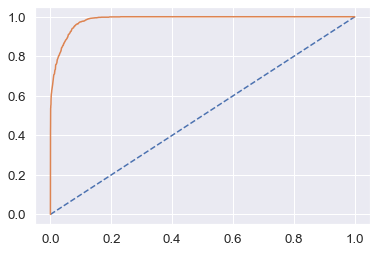

In [2841]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Bag_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % Bag_train_auc)
# calculate roc curve
Bag_train_fpr, Bag_train_tpr, Bag_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Bag_train_fpr, Bag_train_tpr)

AUC: 0.958


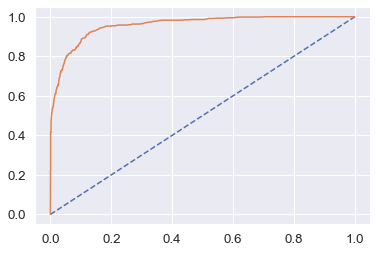

In [2842]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Bag_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % Bag_test_auc)
# calculate roc curve
Bag_test_fpr, Bag_test_tpr, Bag_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Bag_test_fpr, Bag_test_tpr)

# Random forest classifier grid search

In [665]:
param_grid = {
    'max_depth': [10,12], #  3,5,7,9
    'max_features': [6,8,12], # take the sqrt of the number of features
    'min_samples_leaf': [10,20],  # 1-3% of data
    'min_samples_split': [50,100], # 3 times of min_Sample_leaf
    'n_estimators': [300,500] 
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [666]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12], 'max_features': [6, 8, 12],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [50, 100],
                         'n_estimators': [300, 500]})

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [1693]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [1694]:
RF_score_train = best_grid.score(X_train,train_labels)
RF_score_train

0.9279370718091855

In [1696]:
RF_score_test = best_grid.score(X_test,test_labels)
RF_score_test

0.9162226169330965

In [1697]:
confusion_matrix(train_labels,ytrain_predict)

array([[6412,  143],
       [ 425,  902]], dtype=int64)

In [1698]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6555
           1       0.86      0.68      0.76      1327

    accuracy                           0.93      7882
   macro avg       0.90      0.83      0.86      7882
weighted avg       0.93      0.93      0.92      7882



In [1699]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2809
           1       0.84      0.62      0.72       569

    accuracy                           0.92      3378
   macro avg       0.88      0.80      0.83      3378
weighted avg       0.91      0.92      0.91      3378



In [1700]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
RF_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
RF_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
RF_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
RF_train_f1=round(df.loc["1"][2],2)


print ('RF_train_precision ',RF_train_precision)
print ('RF_train_recall ',RF_train_recall)
print ('RF_train_f1 ',RF_train_f1)

RF_train_precision  0.86
RF_train_recall  0.68
RF_train_f1  0.76


In [1701]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
RF_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
RF_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
RF_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
RF_test_f1=round(df.loc["1"][2],2)


print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

RF_test_precision  0.84
RF_test_recall  0.62
RF_test_f1  0.72


AUC: 0.971


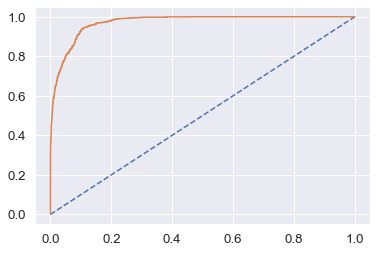

In [1702]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % RF_train_auc)
# calculate roc curve
RF_train_fpr, RF_train_tpr, RF_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_train_fpr, RF_train_tpr)

AUC: 0.951


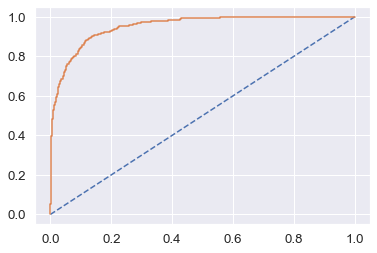

In [1686]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
RF_test_fpr, RF_test_tpr, RF_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr)

# Ada Booster

In [2663]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,train_labels)
y_pred_test=clfADB.predict(X_test)
y_pred_train=clfADB.predict(X_train)
model_scoreADB_test = clfADB.score(X_test, test_labels)
model_scoreADB_train = clfADB.score(X_train, train_labels)
print(model_scoreADB_test)
print(model_scoreADB_train)
print(metrics.confusion_matrix(test_labels, y_pred_test))

0.8996447602131439
0.8982491753362091
[[2697  112]
 [ 227  342]]


In [2664]:
print(metrics.confusion_matrix(train_labels, y_pred_train))

[[6296  259]
 [ 543  784]]


In [2661]:
from sklearn.metrics import confusion_matrix,classification_report
print(metrics.classification_report(train_labels, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.75      0.59      0.66      1327

    accuracy                           0.90      7882
   macro avg       0.84      0.78      0.80      7882
weighted avg       0.89      0.90      0.89      7882



In [1705]:
from sklearn.metrics import confusion_matrix,classification_report
print(metrics.classification_report(test_labels, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.75      0.60      0.67       569

    accuracy                           0.90      3378
   macro avg       0.84      0.78      0.80      3378
weighted avg       0.89      0.90      0.90      3378



In [1706]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Ada_metrics=classification_report(train_labels, y_pred_train,output_dict=True)
df=pd.DataFrame(Ada_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Ada_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Ada_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Ada_train_f1=round(df.loc["1"][2],2)


print ('Ada_train_precision ',Ada_train_precision)
print ('Ada_train_recall ',Ada_train_recall)
print ('Ada_train_f1 ',Ada_train_f1)

Ada_train_precision  0.75
Ada_train_recall  0.59
Ada_train_f1  0.66


In [1707]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Ada_metrics=classification_report(test_labels, y_pred_test,output_dict=True)
df=pd.DataFrame(Ada_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Ada_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Ada_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Ada_test_f1=round(df.loc["1"][2],2)


print ('Ada_test_precision ',Ada_test_precision)
print ('Ada_test_recall ',Ada_test_recall)
print ('Ada_test_f1 ',Ada_test_f1)

Ada_test_precision  0.75
Ada_test_recall  0.6
Ada_test_f1  0.67


AUC: 0.923


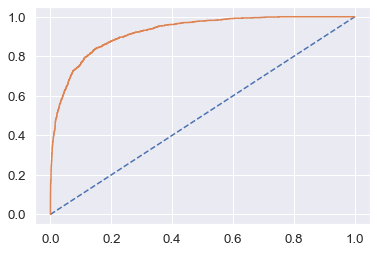

In [1708]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = clfADB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Ada_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % Ada_train_auc)
# calculate roc curve
Ada_train_fpr, Ada_train_tpr, Ada_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Ada_train_fpr, Ada_train_tpr)

AUC: 0.913


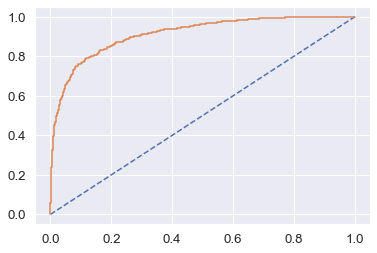

In [1709]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = clfADB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Ada_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % Ada_test_auc)
# calculate roc curve
Ada_test_fpr, Ada_test_tpr, Ada_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Ada_test_fpr, Ada_test_tpr)

# Gradient Booster

In [2665]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train,train_labels)

In [2666]:
y_predict_test = gbcl.predict(X_test)
gbcl_score_test=gbcl.score(X_test,test_labels)
print(gbcl.score(X_test,test_labels))
print(metrics.confusion_matrix(test_labels, y_predict_test))

0.9076376554174067
[[2743   66]
 [ 246  323]]


In [2667]:
y_predict_train = gbcl.predict(X_train)
gbcl_score_train=gbcl.score(X_train,train_labels)
print(gbcl.score(X_train,train_labels))
print(metrics.confusion_matrix(train_labels, y_predict_train))

0.9136006089824917
[[6402  153]
 [ 528  799]]


In [2668]:
from sklearn.metrics import confusion_matrix,classification_report
print(metrics.classification_report(train_labels, y_predict_train))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6555
           1       0.84      0.60      0.70      1327

    accuracy                           0.91      7882
   macro avg       0.88      0.79      0.83      7882
weighted avg       0.91      0.91      0.91      7882



In [2669]:
from sklearn.metrics import confusion_matrix,classification_report
print(metrics.classification_report(test_labels, y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2809
           1       0.83      0.57      0.67       569

    accuracy                           0.91      3378
   macro avg       0.87      0.77      0.81      3378
weighted avg       0.90      0.91      0.90      3378



In [1715]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
GradB_metrics=classification_report(test_labels, y_predict_test,output_dict=True)
df=pd.DataFrame(GradB_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
GradB_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
GradB_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
GradB_test_f1=round(df.loc["1"][2],2)


print ('GradB_test_precision ',GradB_test_precision)
print ('GradB_test_recall ',GradB_test_recall)
print ('GradB_test_f1 ',GradB_test_f1)

GradB_test_precision  0.83
GradB_test_recall  0.57
GradB_test_f1  0.67


In [1716]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
GradB_metrics=classification_report(train_labels, y_predict_train,output_dict=True)
df=pd.DataFrame(GradB_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
GradB_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
GradB_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
GradB_train_f1=round(df.loc["1"][2],2)


print ('GradB_train_precision ',GradB_train_precision)
print ('GradB_train_recall ',GradB_train_recall)
print ('GradB_train_f1 ',GradB_train_f1)

GradB_train_precision  0.84
GradB_train_recall  0.6
GradB_train_f1  0.7


AUC: 0.934


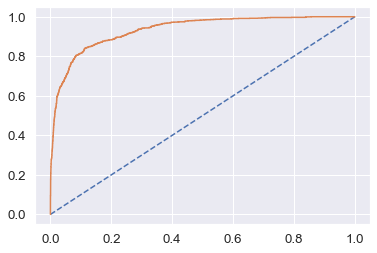

In [1717]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr)

AUC: 0.916


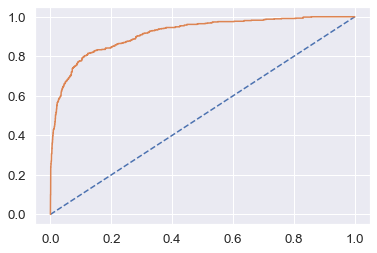

In [1718]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr)

# SVM Support vector machine( new classification technique)

In [322]:
from sklearn.svm import SVC
 
# Building a Support Vector Machine on train data
svc_model = SVC(C=.1, kernel='linear',gamma= 1,class_weight='balanced')
svc_model.fit(X_train,train_labels)
 
prediction_test = svc_model.predict(X_test)
prediction_train = svc_model.predict(X_train)

# check the accuracy on the training set
SVM_score_train=svc_model.score(X_train,train_labels)
SVM_score_test=svc_model.score(X_test,test_labels)
print(svc_model.score(X_train,train_labels))
print(svc_model.score(X_test,test_labels))

0.7951027657954833
0.7821195973949082


In [323]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(train_labels, prediction_train),'\n')
print('Classification Report','\n',metrics.classification_report(train_labels, prediction_train))

Confusion Matrix 
 [[5164 1391]
 [ 224 1103]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.79      0.86      6555
           1       0.44      0.83      0.58      1327

    accuracy                           0.80      7882
   macro avg       0.70      0.81      0.72      7882
weighted avg       0.87      0.80      0.82      7882



In [2670]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels, prediction_test),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels, prediction_test))

Confusion Matrix 
 [[2732   77]
 [ 291  278]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [1722]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels, prediction_test),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels, prediction_test))

Confusion Matrix 
 [[2737   72]
 [ 320  249]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.78      0.44      0.56       569

    accuracy                           0.88      3378
   macro avg       0.84      0.71      0.75      3378
weighted avg       0.88      0.88      0.87      3378



In [1723]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
SVM_metrics=classification_report(train_labels, prediction_train,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
SVM_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
SVM_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
SVM_train_f1=round(df.loc["1"][2],2)


print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_train_precision  0.76
SVM_train_recall  0.44
SVM_train_f1  0.56


In [1724]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
SVM_metrics=classification_report(test_labels, prediction_test,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
SVM_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
SVM_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
SVM_test_f1=round(df.loc["1"][2],2)


print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_precision  0.78
SVM_test_recall  0.44
SVM_test_f1  0.56


C:\Users\91702\anaconda3\envs\Python_JP\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\91702\AppData\Local\Temp\ipykernel_7788\672703795.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks = [0, 1])


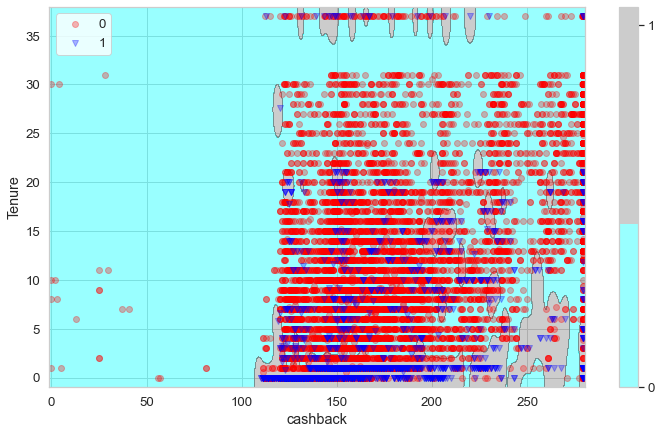

In [329]:
plot_decision_regions(X, y, feat_1 = 15, feat_2 = 0, \
                      classifier = SVC(kernel='rbf', class_weight='balanced', gamma = 0.1))

In [1]:
svc = SVC(kernel='rbf')

NameError: name 'SVC' is not defined

In [2]:
#grid_values = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_values = {'kernel': ['rbf', 'poly']}
grid_m_re = GridSearchCV(svc, param_grid = grid_values, scoring = 'recall')
grid_m_re.fit(X_train, train_labels)

print('Grid best parameter (max. recall): ', grid_m_re.best_params_)

print('Grid best score (recall): ', grid_m_re.best_score_)

NameError: name 'GridSearchCV' is not defined

In [328]:
grid_predictions = grid_m_re.predict(X_test)

print(confusion_matrix(test_labels,grid_predictions))

[[2809    0]
 [ 569    0]]


# Catboost classifier( new classification technique)

In [1725]:
pip install catboost

In [1726]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train,train_labels,        
        
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [1727]:
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)

# check the accuracy on the training set
Cat_score_train=clf.score(X_train,train_labels)
Cat_score_test=clf.score(X_test,test_labels)
print(clf.score(X_train,train_labels))
print(clf.score(X_test,test_labels))

0.8877188530829738
0.8910597986974541


In [1728]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(train_labels, prediction_train),'\n')
print('Classification Report','\n',metrics.classification_report(train_labels, prediction_train))

Confusion Matrix 
 [[6332  223]
 [ 662  665]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.93      6555
           1       0.75      0.50      0.60      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.73      0.77      7882
weighted avg       0.88      0.89      0.88      7882



In [1729]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels, prediction_test),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels, prediction_test))

Confusion Matrix 
 [[2732   77]
 [ 291  278]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [1730]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Cat_metrics=classification_report(train_labels, prediction_train,output_dict=True)
df=pd.DataFrame(Cat_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Cat_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Cat_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Cat_train_f1=round(df.loc["1"][2],2)


print ('Cat_train_precision ',Cat_train_precision)
print ('Cat_train_recall ',Cat_train_recall)
print ('Cat_train_f1 ',Cat_train_f1)

Cat_train_precision  0.75
Cat_train_recall  0.5
Cat_train_f1  0.6


In [1731]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Cat_metrics=classification_report(test_labels, prediction_test,output_dict=True)
df=pd.DataFrame(Cat_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Cat_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Cat_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Cat_test_f1=round(df.loc["1"][2],2)


print ('Cat_test_precision ',Cat_test_precision)
print ('Cat_test_recall ',Cat_test_recall)
print ('Cat_test_f1 ',Cat_test_f1)

Cat_test_precision  0.78
Cat_test_recall  0.49
Cat_test_f1  0.6


AUC: 0.895


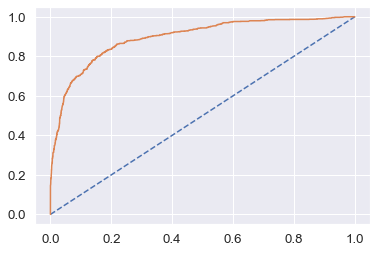

In [1732]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clf_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % clf_train_auc)
# calculate roc curve
clf_train_fpr, clf_train_tpr, clf_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clf_train_fpr, clf_train_tpr)

AUC: 0.882


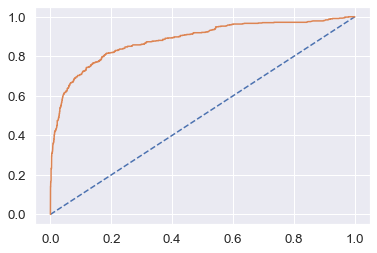

In [1348]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % clf_test_auc)
# calculate roc curve
clf_test_fpr, clf_test_tpr, clf_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clf_test_fpr, clf_test_tpr)

# KNN K nearest neighbours

In [409]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, train_labels1, test_labels1 = train_test_split(churn_X_imputed_scaled, y, test_size=.30, random_state=1, stratify = y)

In [415]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [416]:
KNN.fit(X1_train,train_labels1)

KNeighborsClassifier()

In [417]:
predicted_labels_train = KNN.predict(X1_train)
KNN_score_train=KNN.score(X1_train,train_labels1)
KNN_score_train

0.9736107586906877

In [418]:
predicted_labels_test = KNN.predict(X1_test)
KNN_score_test=KNN.score(X1_test,test_labels1)
KNN_score_test

0.9369449378330373

In [419]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(train_labels1, predicted_labels_train),'\n')
print('Classification Report','\n',metrics.classification_report(train_labels1, predicted_labels_train))

Confusion Matrix 
 [[6486   69]
 [ 139 1188]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6555
           1       0.95      0.90      0.92      1327

    accuracy                           0.97      7882
   macro avg       0.96      0.94      0.95      7882
weighted avg       0.97      0.97      0.97      7882



In [421]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels1, predicted_labels_test),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels1, predicted_labels_test))

Confusion Matrix 
 [[2725   84]
 [ 129  440]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2809
           1       0.84      0.77      0.81       569

    accuracy                           0.94      3378
   macro avg       0.90      0.87      0.88      3378
weighted avg       0.94      0.94      0.94      3378



In [423]:
# calculating the accuracy of models with different values of k
mean_f1 = np.zeros(9)
for i in range(1,10):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,train_labels1)
    yhat= knn.predict(X_test)
    
    mean_f1[i-1] = f1_score(test_labels1, yhat)

mean_f1

NameError: name 'f1_score' is not defined

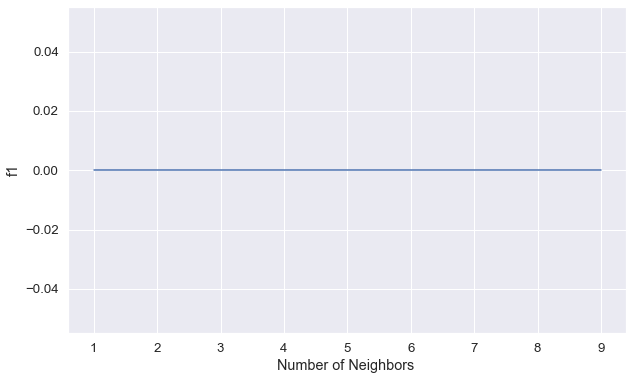

In [425]:
loc = np.arange(1,10,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,10), mean_f1)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('f1')
plt.show()

In [426]:
# knn hyperparameter tuning

In [458]:
grid_params = { 'n_neighbors' : [1,3,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [460]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)

In [461]:
g_res = gs.fit(X1_train,train_labels)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [462]:
g_res.best_score_

0.978432025374277

In [464]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [465]:
knn = KNeighborsClassifier(n_neighbors =1, weights = 'uniform',metric = 'manhattan')
knn.fit(X1_train,train_labels1)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [466]:
predicted_labels_train = knn.predict(X1_train)

In [467]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(train_labels1, predicted_labels_train),'\n')
print('Classification Report','\n',metrics.classification_report(train_labels1, predicted_labels_train))

Confusion Matrix 
 [[6555    0]
 [   0 1327]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [468]:
predicted_labels_train = knn.predict(X1_test)

In [469]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels1, predicted_labels_test),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels1, predicted_labels_test))

Confusion Matrix 
 [[2725   84]
 [ 129  440]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2809
           1       0.84      0.77      0.81       569

    accuracy                           0.94      3378
   macro avg       0.90      0.87      0.88      3378
weighted avg       0.94      0.94      0.94      3378



In [1740]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train,train_labels1)
    # evaluate test accuracy
    scores = knn.score(X1_test,test_labels1)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]  
MCE

[0.026642984014209614,
 0.052397868561278815,
 0.06305506216696266,
 0.07252812314979273,
 0.08555358200118413,
 0.10568383658969804,
 0.11545293072824159,
 0.12611012433392543,
 0.12699822380106573,
 0.12877442273534634]

In [1741]:
ac_scores

[0.9733570159857904,
 0.9476021314387212,
 0.9369449378330373,
 0.9274718768502073,
 0.9144464179988159,
 0.894316163410302,
 0.8845470692717584,
 0.8738898756660746,
 0.8730017761989343,
 0.8712255772646537]

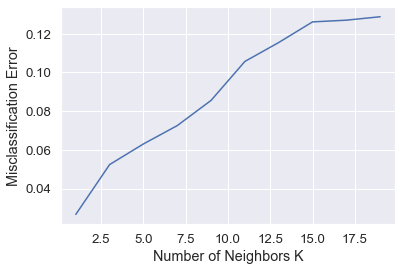

In [1742]:
#Plot misclassification error vs k (with k value on X-axis) using matplotli
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [1743]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
KNN_metrics=classification_report(train_labels, predicted_labels_train,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
KNN_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
KNN_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
KNN_train_f1=round(df.loc["1"][2],2)


print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.95
KNN_train_recall  0.9
KNN_train_f1  0.92


In [1744]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
KNN_metrics=classification_report(test_labels, predicted_labels_test,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
KNN_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
KNN_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
KNN_test_f1=round(df.loc["1"][2],2)


print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.84
KNN_test_recall  0.77
KNN_test_f1  0.81


AUC: 0.995


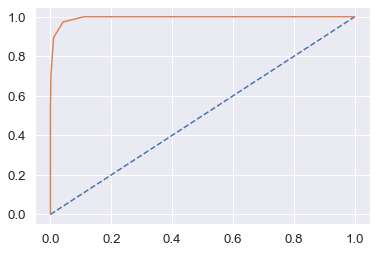

In [1745]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = KNN.predict_proba(X1_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(train_labels1, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_trainthresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)

AUC: 0.969


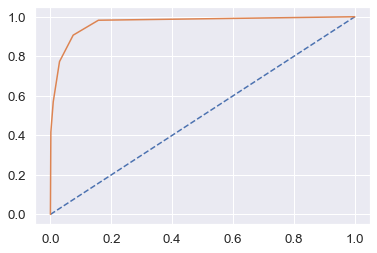

In [1747]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = KNN.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(test_labels1, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)

# LDA Linear Discriminant analysis

In [1748]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X1_train,train_labels1)
train_predict = lda.predict(X1_train)
test_predict = lda.predict(X1_test)

In [1749]:
LDA_score_train=lda.score(X1_train,train_labels1)

In [1750]:
LDA_score_test=lda.score(X1_test,test_labels1)

In [1751]:
print(classification_report(train_labels1, train_predict))
print("End")
print(classification_report(test_labels1, test_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6555
           1       0.76      0.34      0.47      1327

    accuracy                           0.87      7882
   macro avg       0.82      0.66      0.70      7882
weighted avg       0.86      0.87      0.85      7882

End
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2809
           1       0.79      0.33      0.47       569

    accuracy                           0.87      3378
   macro avg       0.83      0.66      0.70      3378
weighted avg       0.86      0.87      0.85      3378



In [1752]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
LDA_metrics=classification_report(train_labels1,train_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
LDA_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
LDA_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
LDA_train_f1=round(df.loc["1"][2],2)


print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.76
LDA_train_recall  0.34
LDA_train_f1  0.47


In [1753]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
LDA_metrics=classification_report(test_labels1,test_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
LDA_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
LDA_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
LDA_test_f1=round(df.loc["1"][2],2)


print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.79
LDA_test_recall  0.33
LDA_test_f1  0.47


AUC: 0.829


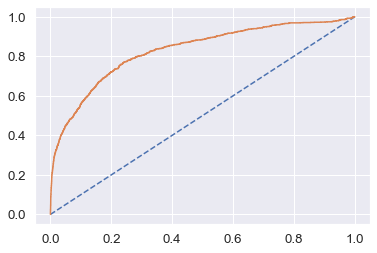

In [1754]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lda.predict_proba(X1_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(train_labels1, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_trainthresholds = roc_curve(train_labels1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)

AUC: 0.805


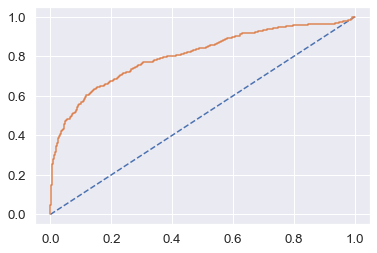

In [1501]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lda.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(test_labels1, probs)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_testthresholds = roc_curve(test_labels1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)

# Comapring all models

In [1759]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LRG_Train':[LRG_modelscore_train,LRG_train_auc,LRG_train_recall,LRG_train_precision,LRG_train_f1],
        'LRG_Test':[LRG_modelscore_test,LRG_test_auc,LRG_test_recall,LRG_test_precision,LRG_test_f1],
       'LDA_Train':[LDA_score_train,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA_Test':[LDA_score_test,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
       'Neural Network Train':[KNN_score_train,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'Neural Network Test':[KNN_score_test,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
          'Naive_bayes_Train':[Naive_score_train,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'Naive_bayes_Test':[Naive_score_test,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],        
         'Bagging_train':[Bag_score_train,Bag_train_auc,Bag_train_recall,Bag_train_precision,Bag_train_f1],
        'Bagging_test':[Bag_score_test,Bag_test_auc,Bag_test_recall,Bag_test_precision,Bag_test_f1],           
         'GradBoosting_train':[gbcl_score_train,gbcl_train_auc,GradB_train_recall,GradB_train_precision,GradB_train_f1],
        'GradBoosting_test':[gbcl_score_test,gbcl_test_auc,GradB_test_recall,GradB_test_precision,GradB_test_f1],           
        'AdaBoosting_train':[model_scoreADB_train,Ada_train_auc,Ada_train_recall,Ada_train_precision,Ada_train_f1],
        'AdaBoosting_test':[model_scoreADB_test,Ada_test_auc,Ada_test_recall,Ada_test_precision,Ada_test_f1],
         'CART_train':[DTree_modelscore_train,Cart_train_auc,Cart_train_recall,Cart_train_precision,Cart_train_f1],
        'CART_test':[DTree_modelscore_test,Cart_test_auc,Cart_test_recall,Cart_test_precision,Cart_test_f1],
         'RF_train':[RF_score_train,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
        'Rf_test':[RF_score_test,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],            
          'SVM_train':[SVM_score_train,RF_train_auc,SVM_train_recall,SVM_train_precision,SVM_train_f1],
        'SVM_test':[SVM_score_test,RF_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1],          
         'Cat_train':[Cat_score_train,clf_train_auc,Cat_train_recall,Cat_train_precision,Cat_train_f1],
        'Cat_test':[Cat_score_test,clf_test_auc,Cat_test_recall,Cat_test_precision,Cat_test_f1],          
                                     
                    },index=index)


round(data,2)

,LRG_Train,LRG_Test,LDA_Train,LDA_Test,Neural Network Train,Neural Network Test,Naive_bayes_Train,Naive_bayes_Test,Bagging_train,Bagging_test,GradBoosting_train,GradBoosting_test,AdaBoosting_train,AdaBoosting_test,CART_train,CART_test,RF_train,Rf_test,SVM_train,SVM_test,Cat_train,Cat_test
Accuracy,0.88,0.88,0.87,0.87,0.97,0.94,0.87,0.86,0.94,0.92,0.91,0.91,0.90,0.90,0.88,0.88,0.93,0.92,0.88,0.88,0.89,0.89
AUC,0.87,0.85,0.83,0.80,0.99,0.97,0.83,0.80,0.98,0.96,0.93,0.92,0.92,0.91,0.91,0.90,0.97,0.95,0.97,0.95,0.89,0.88
Recall,0.47,0.46,0.34,0.33,0.90,0.77,0.61,0.57,0.70,0.61,0.60,0.57,0.59,0.60,0.52,0.53,0.68,0.62,0.44,0.44,0.50,0.49
Precision,0.74,0.75,0.76,0.79,0.95,0.84,0.61,0.59,0.93,0.87,0.84,0.83,0.75,0.75,0.71,0.70,0.86,0.84,0.76,0.78,0.75,0.78
F1 Score,0.57,0.57,0.47,0.47,0.92,0.81,0.61,0.58,0.80,0.72,0.70,0.67,0.66,0.67,0.60,0.60,0.76,0.72,0.56,0.56,0.60,0.60


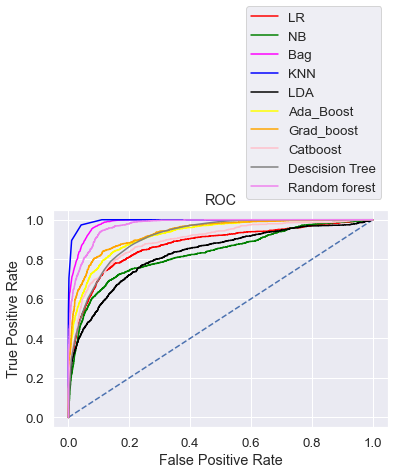

In [1764]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LRG_train_fpr, LRG_train_tpr,color='red',label="LR")
plt.plot(NB_train_fpr, NB_train_tpr,color='green',label="NB")
plt.plot(Bag_train_fpr, Bag_train_tpr,color='magenta',label="Bag")
plt.plot(KNN_train_fpr, KNN_train_tpr,color='blue',label="KNN")
plt.plot(LDA_train_fpr, LDA_train_tpr,color='black',label="LDA")
plt.plot(Ada_train_fpr, Ada_train_tpr,color='yellow',label="Ada_Boost")
plt.plot(gbcl_train_fpr, gbcl_train_tpr,color='orange',label="Grad_boost")
plt.plot(clf_train_fpr, clf_train_tpr,color='pink',label="Catboost")
plt.plot(Cart_train_fpr, Cart_train_tpr,color='grey',label="Descision Tree")
plt.plot(RF_train_fpr, RF_train_tpr,color='violet',label="Random forest")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

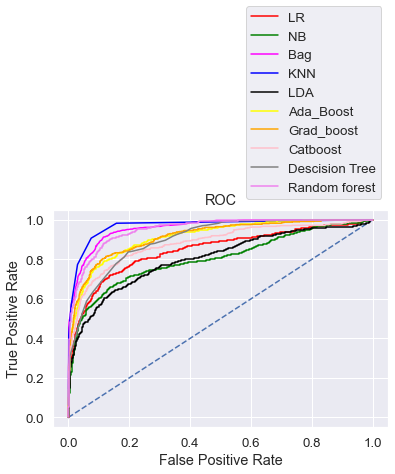

In [1765]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LRG_test_fpr, LRG_test_tpr,color='red',label="LR")
plt.plot(NB_test_fpr, NB_test_tpr,color='green',label="NB")
plt.plot(Bag_test_fpr, Bag_test_tpr,color='magenta',label="Bag")
plt.plot(KNN_test_fpr, KNN_test_tpr,color='blue',label="KNN")
plt.plot(LDA_test_fpr, LDA_test_tpr,color='black',label="LDA")
plt.plot(Ada_test_fpr, Ada_test_tpr,color='yellow',label="Ada_Boost")
plt.plot(gbcl_test_fpr, gbcl_test_tpr,color='orange',label="Grad_boost")
plt.plot(clf_test_fpr, clf_test_tpr,color='pink',label="Catboost")
plt.plot(Cart_test_fpr, Cart_test_tpr,color='grey',label="Descision Tree")
plt.plot(RF_test_fpr, RF_test_tpr,color='violet',label="Random forest")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# SMOTE

In [2861]:
from imblearn.over_sampling import SMOTE

In [2862]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,train_labels)

In [2864]:
y_train_res.value_counts()

0    6555
1    6555
Name: Churn, dtype: int64

In [2870]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train_res,y_train_res)
y_pred_test=clfADB.predict(X_test)
model_scoreADB_test = clfADB.score(X_test, test_labels)
print(model_scoreADB_test)
print(metrics.confusion_matrix(test_labels, y_pred_test))

0.8771462403789224
[[2569  240]
 [ 175  394]]


In [2871]:
y_pred_train=clfADB.predict(X_train_res)
model_scoreADB_train = clfADB.score(X_train_res, y_train_res)
model_scoreADB_train

0.9100686498855836

In [2872]:
from sklearn.metrics import confusion_matrix,classification_report
print(metrics.classification_report(test_labels, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2809
           1       0.62      0.69      0.66       569

    accuracy                           0.88      3378
   macro avg       0.78      0.80      0.79      3378
weighted avg       0.88      0.88      0.88      3378



In [2875]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Ada_metrics_smote=classification_report(y_train_res, y_pred_train,output_dict=True)
df=pd.DataFrame(Ada_metrics_smote).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Ada_smote_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Ada_smote_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Ada_smote_train_f1=round(df.loc["1"][2],2)


print ('Ada_smote_train_precision ',Ada_smote_train_precision)
print ('Ada_smote_train_recall ',Ada_smote_train_recall)
print ('Ada_smote_train_f1 ',Ada_smote_train_f1)

Ada_smote_train_precision  0.91
Ada_smote_train_recall  0.9
Ada_smote_train_f1  0.91


In [2876]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
Ada_metrics_smote=classification_report(test_labels, y_pred_test,output_dict=True)
df=pd.DataFrame(Ada_metrics_smote).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
Ada_smote_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
Ada_smote_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
Ada_smote_test_f1=round(df.loc["1"][2],2)


print ('Ada_smote_test_precision ',Ada_smote_test_precision)
print ('Ada_smote_test_recall ',Ada_smote_test_recall)
print ('Ada_smote_test_f1 ',Ada_smote_test_f1)

Ada_smote_test_precision  0.62
Ada_smote_test_recall  0.69
Ada_smote_test_f1  0.66


# SMOTE RANDOM FOREST

In [2877]:
param_grid = {
    'max_depth': [10,12], #  3,5,7,9
    'max_features': [6,8], # take the sqrt of the number of features
    'min_samples_leaf': [10,20],  # 1-3% of data
    'min_samples_split': [50,100], # 3 times of min_Sample_leaf
    'n_estimators': [300,500] 
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [2878]:
grid_search.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12], 'max_features': [6, 8],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [50, 100],
                         'n_estimators': [300, 500]})

In [2880]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 500}

In [2881]:
best_grid = grid_search.best_estimator_

In [2882]:
ytrain_predict = best_grid.predict(X_train_res)
ytest_predict = best_grid.predict(X_test)

In [2883]:
print(classification_report(y_train_res,ytrain_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6555
           1       0.95      0.95      0.95      6555

    accuracy                           0.95     13110
   macro avg       0.95      0.95      0.95     13110
weighted avg       0.95      0.95      0.95     13110



In [2892]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2809
           1       0.73      0.77      0.75       569

    accuracy                           0.91      3378
   macro avg       0.84      0.86      0.85      3378
weighted avg       0.91      0.91      0.91      3378



In [2895]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
RF_metrics_smote=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(RF_metrics_smote).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
RF_smote_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
RF_smote_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
RF_smote_train_f1=round(df.loc["1"][2],2)


print ('RF_smote_train_precision ',RF_smote_train_precision)
print ('RF_smote_train_recall ',RF_smote_train_recall)
print ('RF_smote_train_f1 ',RF_smote_train_f1)

RF_smote_train_precision  0.95
RF_smote_train_recall  0.95
RF_smote_train_f1  0.95


In [2896]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
RF_metrics_smote=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(RF_metrics_smote).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
RF_smote_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
RF_smote_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
RF_smote_test_f1=round(df.loc["1"][2],2)


print ('RF_smote_test_precision ',RF_smote_test_precision)
print ('RF_smote_test_recall ',RF_smote_test_recall)
print ('RF_smote_test_f1 ',RF_smote_test_f1)

RF_smote_test_precision  0.73
RF_smote_test_recall  0.77
RF_smote_test_f1  0.75


From the classification report, we have an accuracy of 91 %and recall as 81% and precision as 70 % for churn case.
81% recall means that 81% times actual churn were identified as churners.
70% precision means 70% times predicted churn are actually churn.


# Smote Bagging

In [1794]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'max_features': [4, 6,8,16],
    'max_samples': [50, 100,1050],    
    'n_estimators': [101,301,501]
}

bgcl_GS = BaggingClassifier()

grid_search = GridSearchCV(estimator = bgcl_GS, param_grid = param_grid, cv = 5)

In [1795]:
grid_search.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [4, 6, 8, 16],
                         'max_samples': [50, 100, 1050],
                         'n_estimators': [101, 301, 501]})

In [1796]:
grid_search.best_params_

{'max_features': 8, 'max_samples': 1050, 'n_estimators': 101}

In [1797]:
best_grid = grid_search.best_estimator_

In [1798]:
ytrain_predict = best_grid.predict(X_train_res)
ytest_predict = best_grid.predict(X_test)

In [1799]:
print(classification_report(y_train_res,ytrain_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6555
           1       0.98      0.96      0.97      6555

    accuracy                           0.97     13110
   macro avg       0.97      0.97      0.97     13110
weighted avg       0.97      0.97      0.97     13110



In [1800]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2809
           1       0.80      0.70      0.75       569

    accuracy                           0.92      3378
   macro avg       0.87      0.83      0.85      3378
weighted avg       0.92      0.92      0.92      3378



# Smote KNN method

In [2885]:
sm = SMOTE(random_state=2)
X1_train_res, y1_train_res = sm.fit_resample(X1_train,train_labels1)

In [2886]:
from sklearn.neighbors import KNeighborsClassifier
KNN_smote = KNeighborsClassifier()

In [2887]:
KNN_smote.fit(X1_train_res,y1_train_res)

KNeighborsClassifier()

In [2888]:
predicted_labels_train1 = KNN_smote.predict(X1_train_res)
KNN_score_train1=KNN_smote.score(X1_train_res,y1_train_res)
KNN_score_train1

0.9799389778794814

In [2889]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(y1_train_res, predicted_labels_train1),'\n')
print('Classification Report','\n',metrics.classification_report(y1_train_res, predicted_labels_train1))

Confusion Matrix 
 [[6298  257]
 [   6 6549]] 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      6555
           1       0.96      1.00      0.98      6555

    accuracy                           0.98     13110
   macro avg       0.98      0.98      0.98     13110
weighted avg       0.98      0.98      0.98     13110



In [2890]:
predicted_labels_test1 = KNN_smote.predict(X1_test)
KNN_score_test1=KNN_smote.score(X1_test,test_labels1)
KNN_score_test1

0.9307282415630551

In [2891]:
from sklearn import metrics
print('Confusion Matrix','\n',metrics.confusion_matrix(test_labels1, predicted_labels_test1),'\n')
print('Classification Report','\n',metrics.classification_report(test_labels1, predicted_labels_test1))

Confusion Matrix 
 [[2597  212]
 [  22  547]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96      2809
           1       0.72      0.96      0.82       569

    accuracy                           0.93      3378
   macro avg       0.86      0.94      0.89      3378
weighted avg       0.95      0.93      0.93      3378



In [2897]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
KNN_metrics_smote=classification_report(y_train_res,predicted_labels_train1,output_dict=True)
df=pd.DataFrame(KNN_metrics_smote).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
KNN_smote_train_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
KNN_smote_train_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
KNN_smote_train_f1=round(df.loc["1"][2],2)


print ('KNN_smote_train_precision ',KNN_smote_train_precision)
print ('KNN_smote_train_recall ',KNN_smote_train_recall)
print ('KNN_smote_train_f1 ',KNN_smote_train_f1)

KNN_smote_train_precision  0.96
KNN_smote_train_recall  1.0
KNN_smote_train_f1  0.98


In [2898]:
# below code is creating a classification report and storing in rf_metric. this is then used to convert into dataframe
KNN_metrics_smote=classification_report(test_labels1,predicted_labels_test1,output_dict=True)
df=pd.DataFrame(KNN_metrics_smote).transpose()

# The code is accessing the index values (1 -positives) of the dataframe index-1, first value(0) which is precision and with
# 2 decimal digit
KNN_smote_test_precision=round(df.loc["1"][0],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, second value(1) which is recall and with
# 2 decimal digit
KNN_smote_test_recall=round(df.loc["1"][1],2)

# The code is accessing the index values (1 -positives) of the dataframe index-1, third value(2) which is precision and with
# 2 decimal digit
KNN_smote_test_f1=round(df.loc["1"][2],2)


print ('KNN_smote_test_precision ',KNN_smote_test_precision)
print ('KNN_smote_test_recall ',KNN_smote_test_recall)
print ('KNN_smote_test_f1 ',KNN_smote_test_f1)

KNN_smote_test_precision  0.72
KNN_smote_test_recall  0.96
KNN_smote_test_f1  0.82


In [2901]:
index=['Accuracy','Recall','Precision','F1 Score']
data = pd.DataFrame({
       'KNN Train':[KNN_score_train1,KNN_smote_train_recall,KNN_smote_train_precision,KNN_smote_train_f1],
        'KNN Test':[KNN_score_test1,KNN_smote_test_recall,KNN_smote_test_precision,KNN_smote_test_f1],
                
         'Bagging_train':[Bag_score_train,Bag_train_recall,Bag_train_precision,Bag_train_f1],
        'Bagging_test':[Bag_score_test,Bag_test_recall,Bag_test_precision,Bag_test_f1],           
                 
        'AdaBoosting_train':[model_scoreADB_train,Ada_smote_train_recall,Ada_smote_train_precision,Ada_smote_train_f1],
        'AdaBoosting_test':[model_scoreADB_test,Ada_smote_test_recall,Ada_smote_test_precision,Ada_smote_test_f1],
         'RF_train':[RF_score_train,RF_smote_train_recall,RF_smote_train_precision,RF_smote_train_f1],
        'Rf_test':[RF_score_test,RF_smote_test_recall,RF_smote_test_precision,RF_smote_test_f1],            
        
                    },index=index)


round(data,2)

,KNN Train,KNN Test,Bagging_train,Bagging_test,AdaBoosting_train,AdaBoosting_test,RF_train,Rf_test
Accuracy,0.98,0.93,0.94,0.92,0.91,0.88,0.93,0.92
Recall,1.00,0.96,0.71,0.62,0.90,0.69,0.95,0.77
Precision,0.96,0.72,0.91,0.87,0.91,0.62,0.95,0.73
F1 Score,0.98,0.82,0.80,0.72,0.91,0.66,0.95,0.75


In [1]:
# Best Model Prediction
KNN model perform best with 97% accuracy, 
Recall shows actual churners are predicted 90% times correctly, Model does not overfit and equally performs well on test data


# Insights

In [1]:
#Insights
83% do not churn and 16% churn
65% of the total customers come from City_Tier-1 out of which 3.53% tend to churn
59% of the total customers are Male and out of which 4% churn
50% of total customers use debit card as mode of payment
52% of the total customers are married whereas percentage of churn is more among singles
68% of Total customers use mobile as a payment device and out of which 4% churn
Overall percentage of churn is less and there is huge imbalance in the target variable churn.


SyntaxError: invalid syntax (552098911.py, line 2)

# Business recommendations

In [ ]:
#Business recommendations

Focusing on extended plans(quarterly, annually) might help in retaining the customers .

One month subscription free on quarterly and semi annual subscription.

Increasing the quality of customer care support specially in City_Tier-1

Focused plans for singles (incorporating  gaming channels, onboarding international channels with new content)

Special pay-per-event packages for important sports’ tournaments instead of charging for the whole month.


